# **Seaborn Scatter Plot**

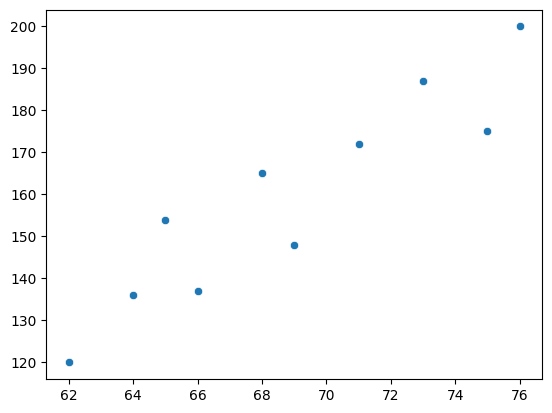

In [1]:
import seaborn as sns, matplotlib.pyplot as plt, numpy as np, pandas as pd

height = [62, 64, 69, 75, 66, 68, 65, 71, 76, 73]
weight = [120, 136, 148, 175, 137, 165, 154, 172, 200, 187]

sns.scatterplot(x=height, y=weight)
plt.show()

#  **Count Plot**

Count plots take in a categorical list and return bars that represent the number of list entries per category.

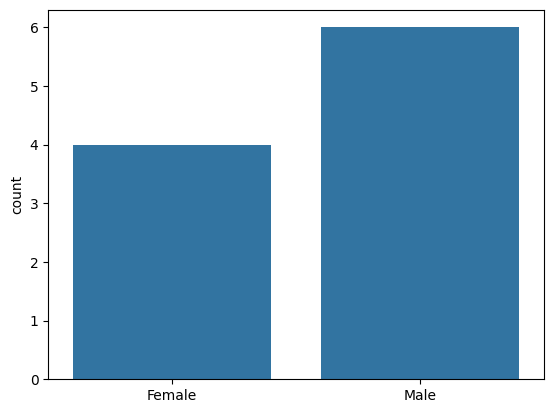

In [ ]:
gender = ["Female", "Female", "Female", "Female", "Male", "Male", "Male", "Male", "Male", "Male"]
sns.countplot(x=gender)
plt.show()

### ***Making a scatter plot with lists***

In this exercise, we'll use a dataset that contains information about 227 countries. This dataset has lots of interesting information on each country, such as the country's birth rates, death rates, and its gross domestic product (GDP). GDP is the value of all the goods and services produced in a year, expressed as dollars per person.

We've created three lists of data from this dataset to get you started. `gdp` is a list that contains the value of GDP per country, expressed as dollars per person. `phones` is a list of the number of mobile phones per 1,000 people in that country. Finally, `percent_literate` is a list that contains the percent of each country's population that can read and write.

* Create a scatter plot of GDP (`gdp`) vs. number of phones per 1000 people (`phones`).
* Change the scatter plot so it displays the percent of the population that can read and write (`percent_literate`) on the y-axis.

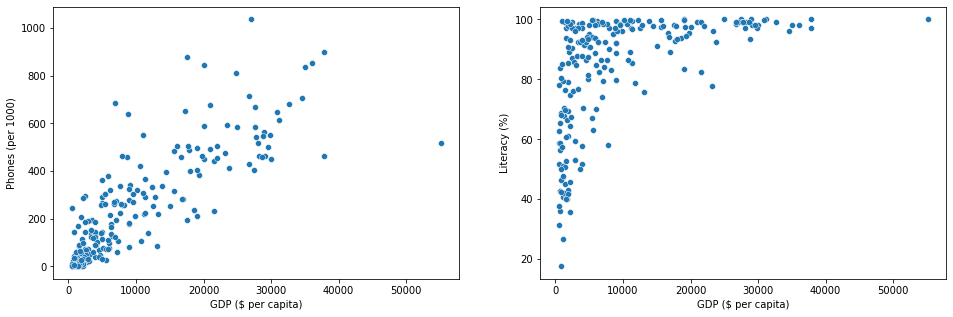

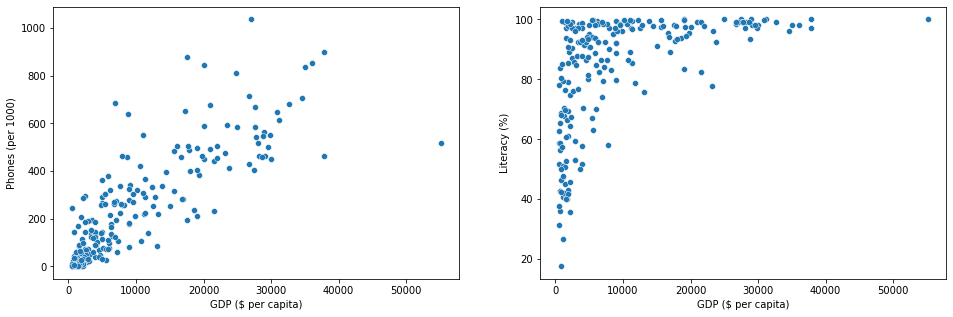

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#fig, ax=plt.subplots(1, 2, figsize=(16,8))
df = pd.read_csv('countries-of-the-world.csv')
df['Literacy (%)'] = df['Literacy (%)'].str.replace(',', '.').astype('float')
df['Phones (per 1000)'] = df['Phones (per 1000)'].str.replace(',', '.').astype('float')
gdp = list(df['GDP ($ per capita)'].values)
percent_literate = list(df['Literacy (%)'])
phones = list(df['Phones (per 1000)'])


# Change this scatter plot to have percent literate on the y-axis
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.scatterplot(x=gdp, y=phones, ax=ax[0])
ax[0].set_xlabel('GDP ($ per capita)')
ax[0].set_ylabel('Phones (per 1000)')
sns.scatterplot(x=gdp, y=percent_literate, ax=ax[1])
ax[1].set_xlabel('GDP ($ per capita)')
ax[1].set_ylabel('Literacy (%)')
plt.show()

# Using dataframe directly

fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.scatterplot(x='GDP ($ per capita)', y='Phones (per 1000)', data=df, ax=ax[0])
ax[0].set_xlabel('GDP ($ per capita)')
ax[0].set_ylabel('Phones (per 1000)')
sns.scatterplot(x='GDP ($ per capita)', y='Literacy (%)', data=df, ax=ax[1])
ax[1].set_xlabel('GDP ($ per capita)')
ax[1].set_ylabel('Literacy (%)')
plt.show()



Countries with a lower GDP do seem more likely to have a lower percent of the population that can read and write.

### ***Making a count plot with a list***

In the last exercise, we explored a dataset that contains information about 227 countries. Let's do more exploration of this data - specifically, how many countries are in each region of the world?

To do this, we'll need to use a `count` plot. Count plots take in a ***categorical*** list and return bars that represent the number of list entries per category. You can create one here using a list of regions for each country, which is a variable named region.

* Use Seaborn to create a count plot with region on the y-axis.


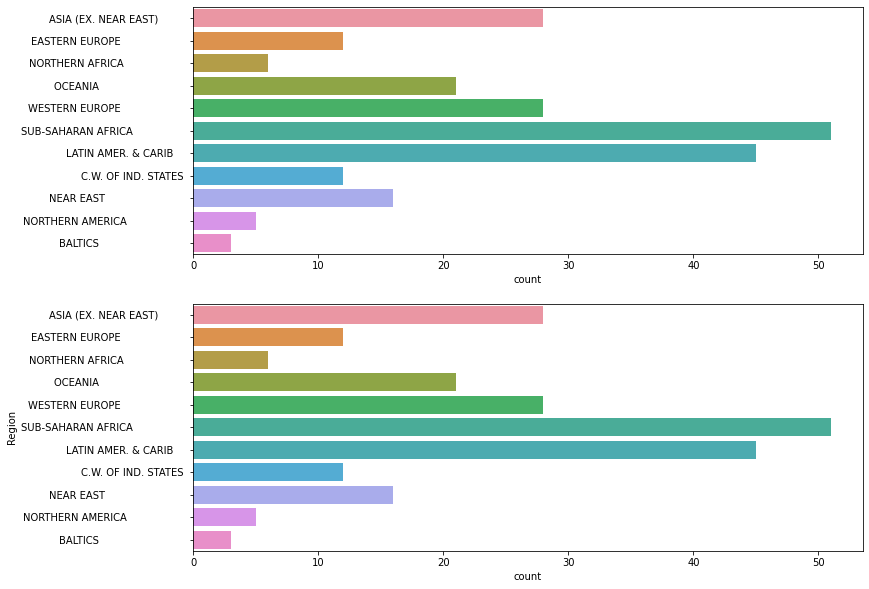

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#fig, ax=plt.subplots(1, 2, figsize=(16,8))
df = pd.read_csv('countries-of-the-world.csv')
region = list(df['Region'].values)

fig, ax = plt.subplots(2, 1, figsize=(12,10))

# Create count plot with region on the y-axis
sns.countplot(y=region, ax=ax[0])

# Using Dataframe directly
sns.countplot(y='Region', data=df, ax=ax[1])

# Show plot
plt.show()

<ipython-input-5-8e43756401d4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='how_masculine', data=df, palette=sns.color_palette("tab10"))
<ipython-input-5-8e43756401d4>:14: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(x='how_masculine', data=df, palette=sns.color_palette("tab10"))


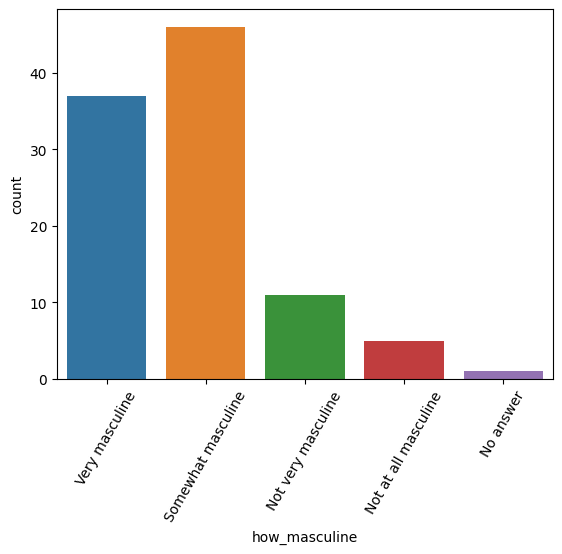

In [ ]:
# Just for the sake of plotting, not a correct way to clean data

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
df = pd.read_csv('masculinity.csv')
df.rename(columns={'Unnamed: 1':'how_masculine'}, inplace=True)
df = df.head(7)
df = df[['AMONG ADULT MEN',	'how_masculine',	'Adult Men']]
df = df.dropna(subset='how_masculine')
df['Adult Men'] = df['Adult Men'].str.replace('%', '')
df['Adult Men'] = df['Adult Men'].astype(int)
masculine = [row['how_masculine'] for _, row in df.iterrows() for _ in range(row['Adult Men'])]
df = pd.DataFrame(data=masculine, columns=['how_masculine'])

sns.countplot(x='how_masculine', data=df, palette=sns.color_palette("tab10"))
plt.xticks(rotation=60)
plt.show()




### **"Tidy" vs. "untidy" data**

**`seaborn`** is not good at untidy data.

Here, we have a sample dataset from a survey of children about their favorite animals. But can we use this dataset as-is with Seaborn? Let's use pandas to import the `csv` file with the data collected from the survey and determine whether it is tidy, which is essential to having it work well with Seaborn.

To get you started, the filepath to the `csv` file has been assigned to the variable `csv_filepath`.

Note that because `csv_filepath` is a Python variable, you will not need to put quotation marks around it when you read the `csv`.

Instructions 1/2

- Read the `csv` file located at `csv_filepath` into a DataFrame named `df`.

- Print the head of df to show the first five rows.

In [ ]:
csv_filepath = 'https://assets.datacamp.com/production/repositories/3996/datasets/7ac19e11cf7ed61205ffe8da5208794b8e2a5086/1.2.1_example_csv.csv'

# Import pandas
import pandas as pd

# Create a DataFrame from csv file
df = pd.read_csv(csv_filepath)

# Print the head of df
print(df.head())

  Unnamed: 0               How old are you?
0     Marion                             12
1      Elroy                             16
2        NaN  What is your favorite animal?
3     Marion                            dog
4      Elroy                            cat


Untidy, because a single column contains different types of information.

### **Making a count plot with a DataFrame**

In this exercise, we'll look at the responses to a survey sent out to young people. Our primary question here is: how many young people surveyed report being scared of spiders? Survey participants were asked to agree or disagree with the statement "I am afraid of spiders". Responses vary from 1 to 5, where 1 is "Strongly disagree" and 5 is "Strongly agree".

To get you started, the filepath to the csv file with the survey data has been assigned to the variable `csv_filepath`.


Instructions

- Create a DataFrame named `df` from the `csv` file located at `csv_filepath`.

- Use the **`countplot()`** function with the `x=` and `data=` arguments to create a count plot with the `"Spiders"` column values on the x-axis.

<ipython-input-62-7ed57bae97dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Spiders', data=df, palette=sns.color_palette("tab10"))
<ipython-input-62-7ed57bae97dd>:4: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(x='Spiders', data=df, palette=sns.color_palette("tab10"))


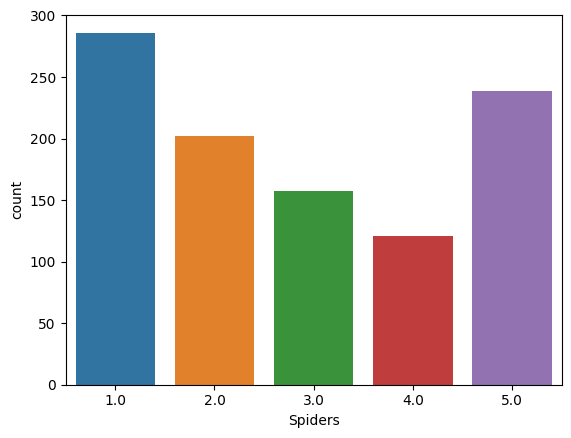

In [ ]:
csv_filepath = 'https://assets.datacamp.com/production/repositories/3996/datasets/ab13162732ae9ca1a9a27e2efd3da923ed6a4e7b/young-people-survey-responses.csv'

df = pd.read_csv(csv_filepath)
sns.countplot(x='Spiders', data=df, palette=sns.color_palette("tab10"))
plt.show()



 # **Adding a third variable with Hue**

 ## ***Tips Dataset***

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


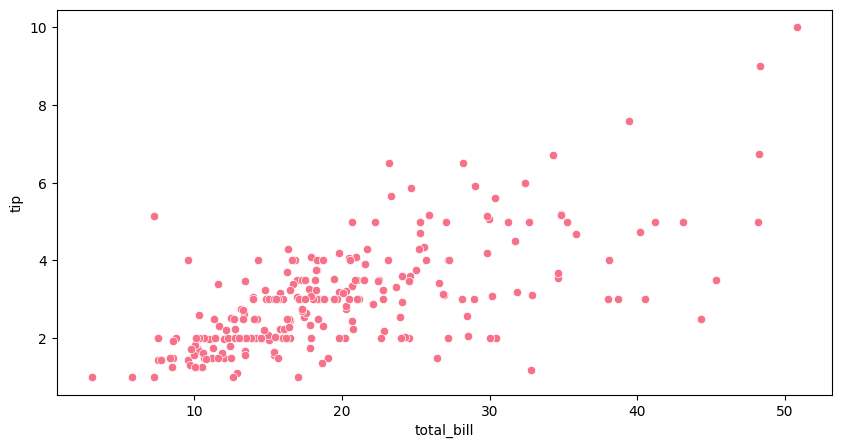

In [ ]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")
display(tips.head())

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

Tips is higher for larger bills.  

## ***What if we want to see which of data points are smokers vs non-smokers***

- Add `'hue='` keyword argument.

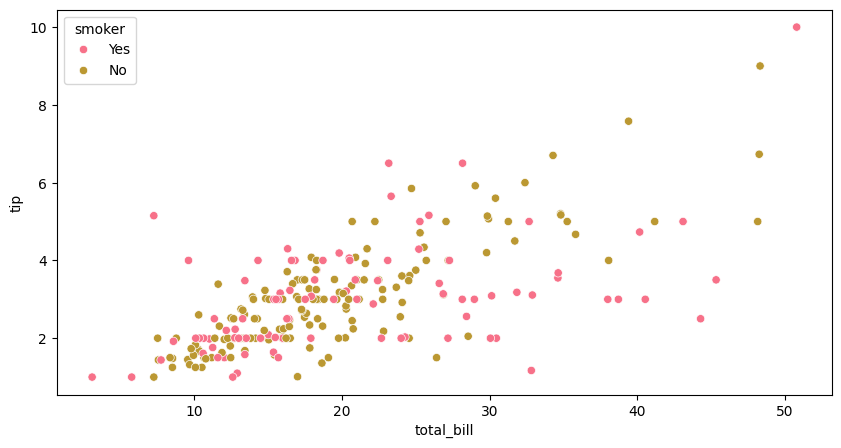

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x="total_bill", y="tip", data=tips, hue='smoker')
plt.show()

## **Specifying hue_order and palette colors**

The `hue_order=` keyword argument takes in a list of values and will set the order of the values in the plot accordingly.

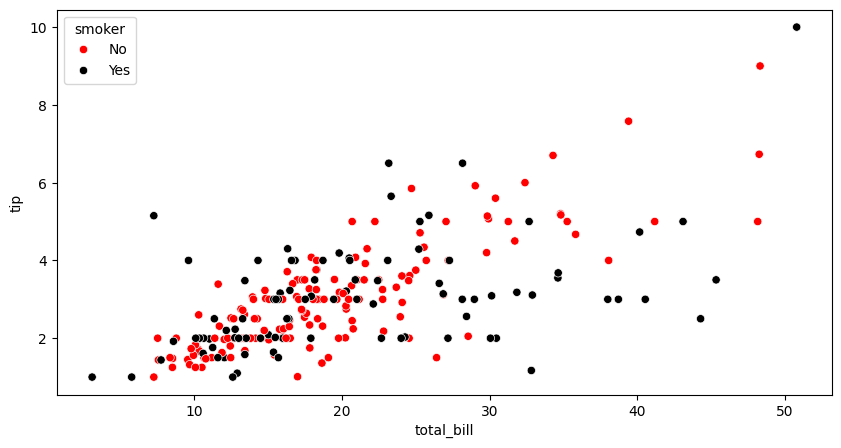

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x="total_bill", y="tip", data=tips, hue='smoker', hue_order=['No', 'Yes'], palette={"Yes":"black","No":"red"})
plt.show()

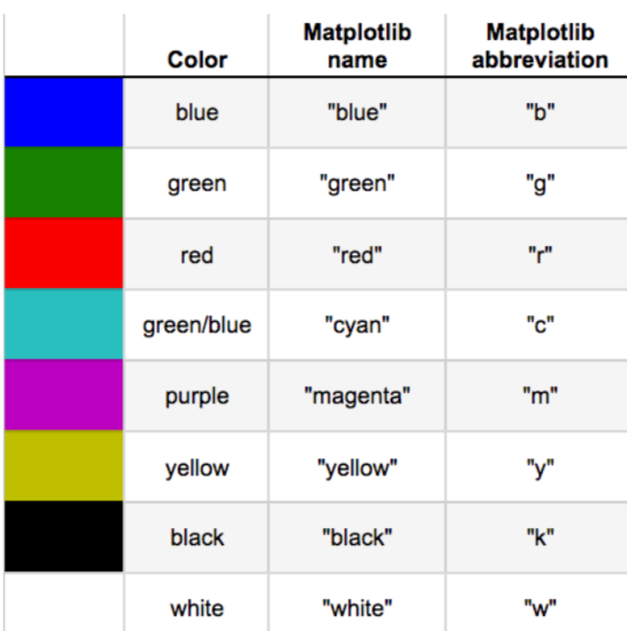

### ***Using hue with count plots***

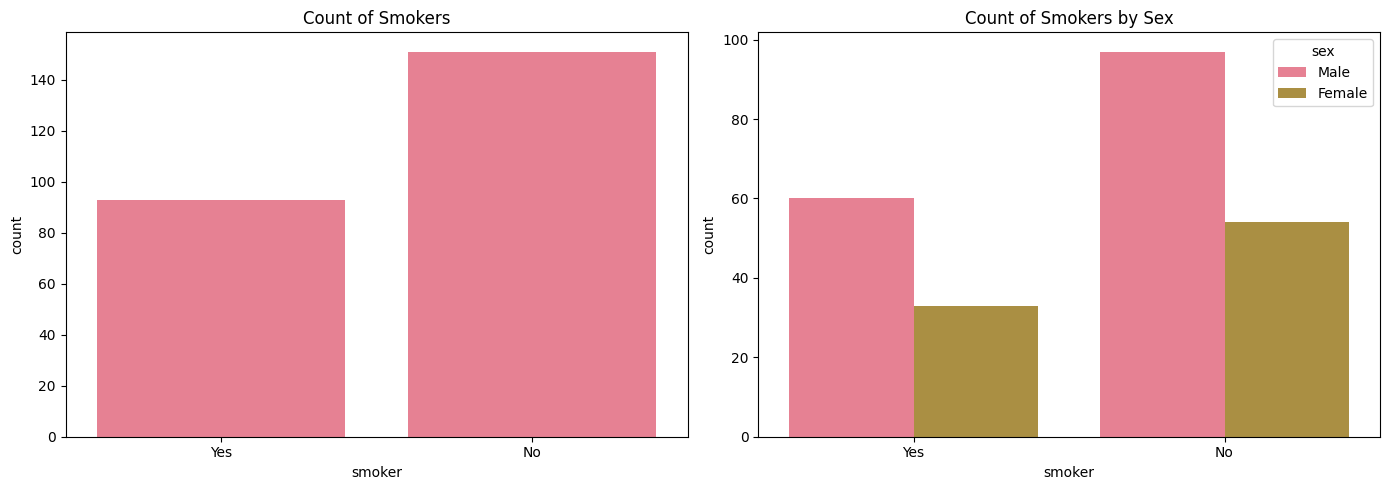

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot the first countplot
sns.countplot(x="smoker", data=tips, ax=axes[0])
axes[0].set_title('Count of Smokers')

# Plot the second countplot with hue
sns.countplot(x="smoker", data=tips, hue="sex", ax=axes[1])
axes[1].set_title('Count of Smokers by Sex')

# Display the plots
plt.tight_layout()
plt.show()

Where do they come from?

In [ ]:
display(tips['smoker'].value_counts().to_frame())
print("\n")
tips.groupby(['smoker', 'sex'])[['smoker']].count()

,count
smoker,
No,151
Yes,93


smoker
smoker sex           
Yes    Male        60
       Female      33
No     Male        97
       Female      54

### ***Hue and scatter plots***

We learned how `hue` allows us to easily make subgroups within Seaborn plots. Let's try it out by exploring data from students in secondary school. We have a lot of information about each student like their age, where they live, their study habits and their extracurricular activities.

For now, we'll look at the relationship between the number of absences they have in school and their final grade in the course, segmented by where the student lives (rural vs. urban area).

* Create a scatter plot with `"absences"` on the x-axis and final grade (`"G3"`) on the y-axis using the DataFrame `student_data`. Color the plot points based on `"location"` (urban vs. rural).
* Make `"Rural"` appear before `"Urban"` in the plot legend.

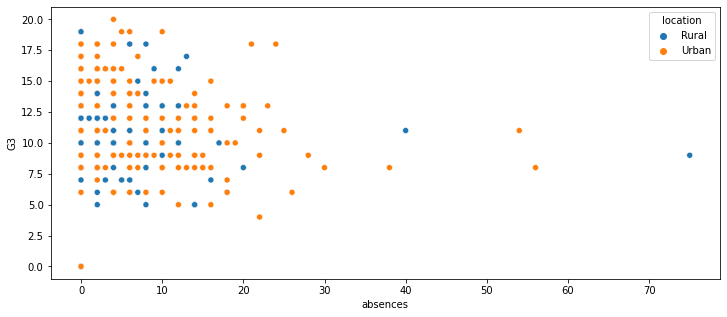

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

student_data = pd.read_csv('student-alcohol-consumption.csv').drop(columns='Unnamed: 0')

fig, ax = plt.subplots(figsize=(12, 5))
# Create a scatter plot of absences vs. final grade
sns.scatterplot(x="absences", y="G3",
                data=student_data,
                hue="location", hue_order=['Rural', 'Urban'], ax=ax)

plt.show()

 It looks like students with higher absences tend to have lower grades in both rural and urban areas.

### ***Hue and count plots***

Let's continue exploring our dataset from students in secondary school by looking at a new variable. The `"school"` column indicates the initials of which school the student attended - either `"GP"` or `"MS"`.

In the above exercise, we created a scatter plot where the plot points were colored based on whether the student lived in an urban or rural area. How many students live in urban vs. rural areas, and does this vary based on what school the student attends? Let's make a count plot with subgroups to find out.

* Fill in the `palette_colors` dictionary to map the `"Rural"` location value to the color `"green"` and the `"Urban"` location value to the color `"blue"`.
* Create a count plot with `"school"` on the x-axis using the `student_data` DataFrame.
* Add subgroups to the plot using `"location"` variable and use the `palette_colors` dictionary to make the location subgroups `green` and `blue`.

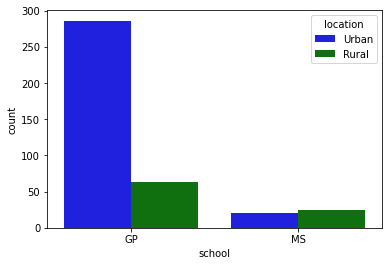

In [ ]:
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

student_data = pd.read_csv('student-alcohol-consumption.csv').drop(columns='Unnamed: 0')

# Create a dictionary mapping subgroup values to colors
palette_colors = {'Rural': "green", 'Urban': "blue"}

# Create a count plot of school with location subgroups
sns.countplot(x='school', data=student_data, hue='location',palette=palette_colors)

plt.show()

Students at GP tend to come from an urban location, but students at MS are more evenly split.

# ***`relplot()`***

- *Relational plot* visualizes relationship between two quantitative variables using either
   - scatter plot
   - line plot

- Create subplots

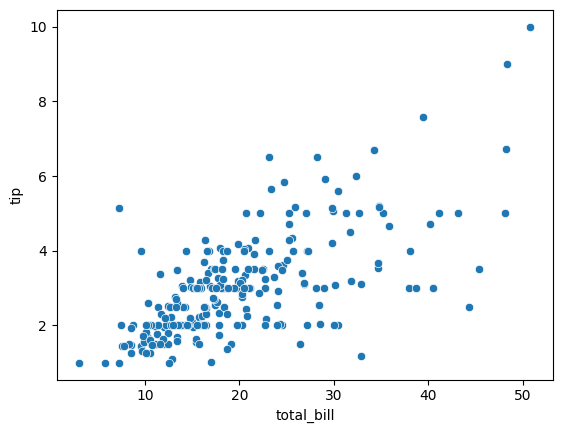

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

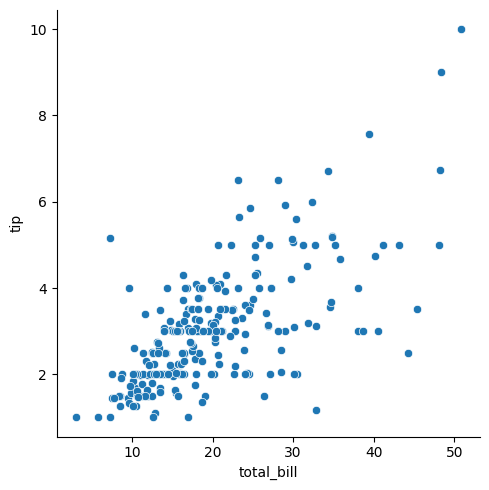

In [ ]:
# No change without additional keyword arguments
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter")
plt.show()

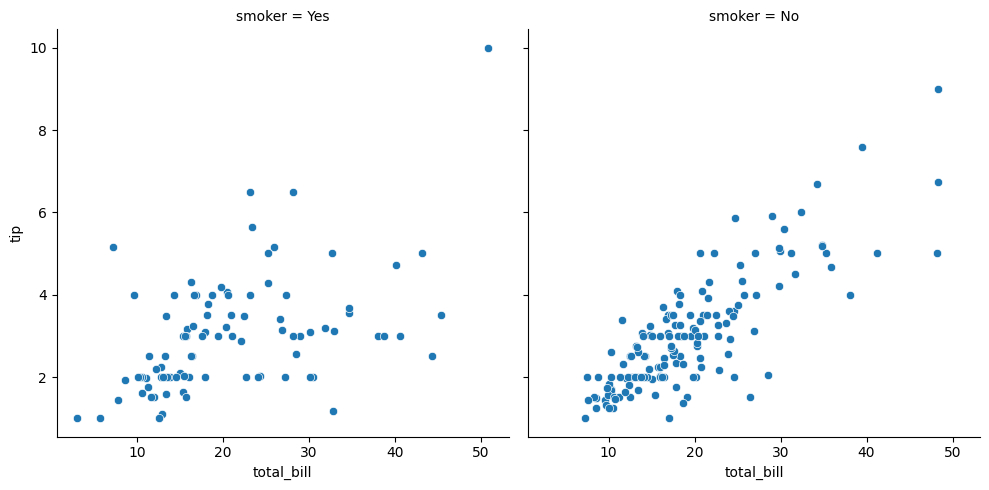

In [ ]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", col="smoker")
plt.show()

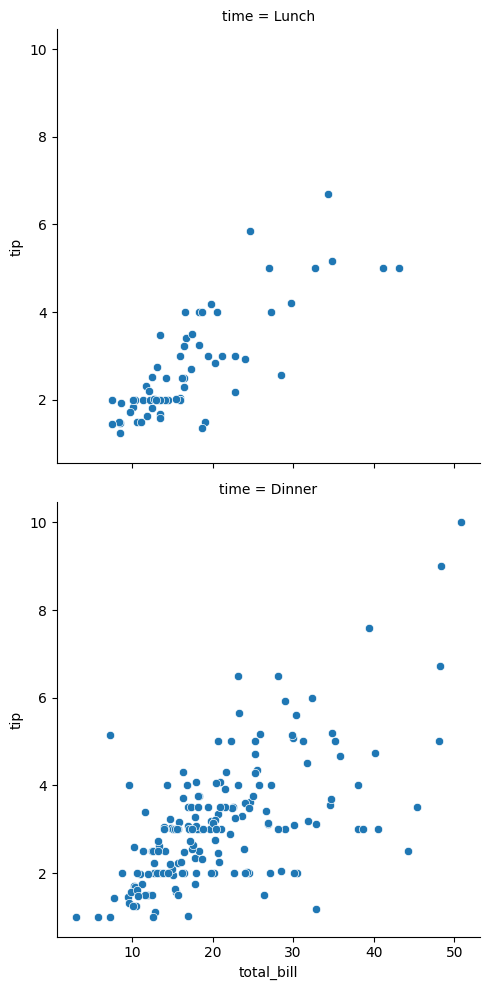

In [ ]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", row='time')
plt.show()

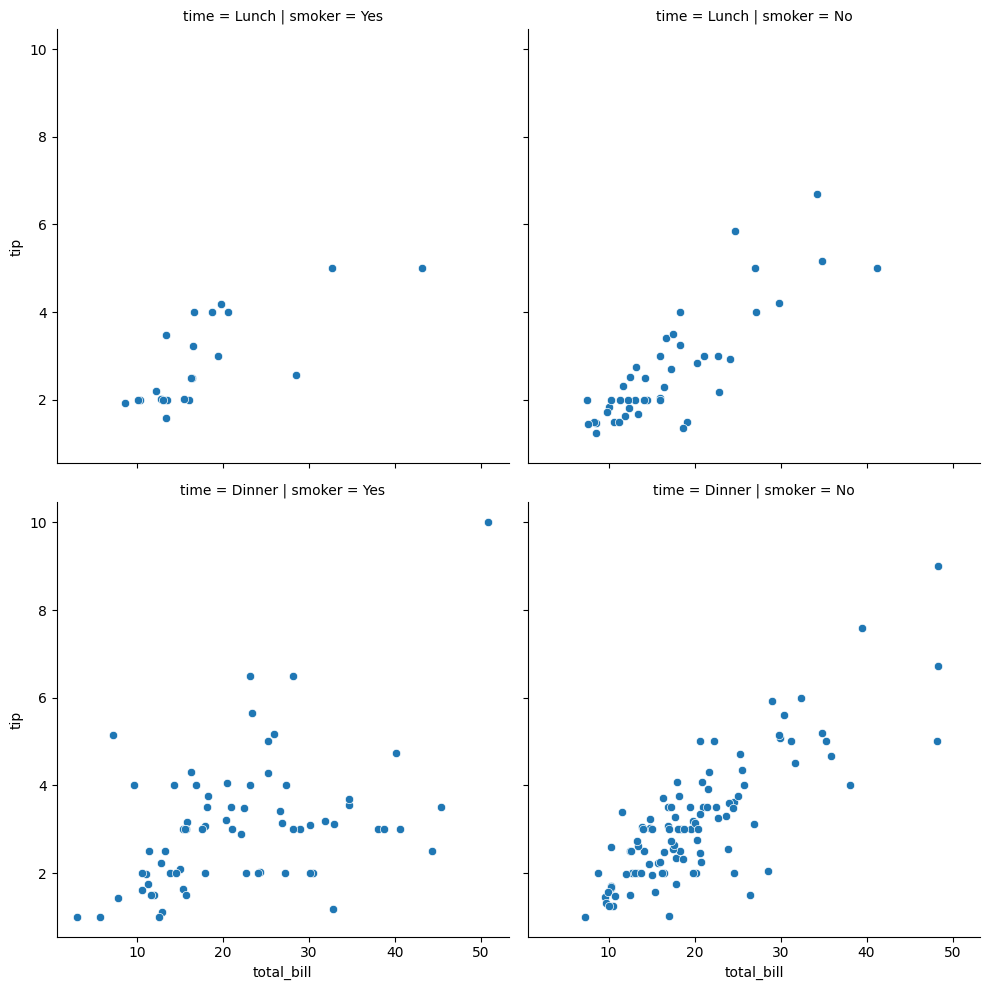

In [ ]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", col="smoker", row='time')
plt.show()

* **`col_wrap=`** indicates number of figures per row

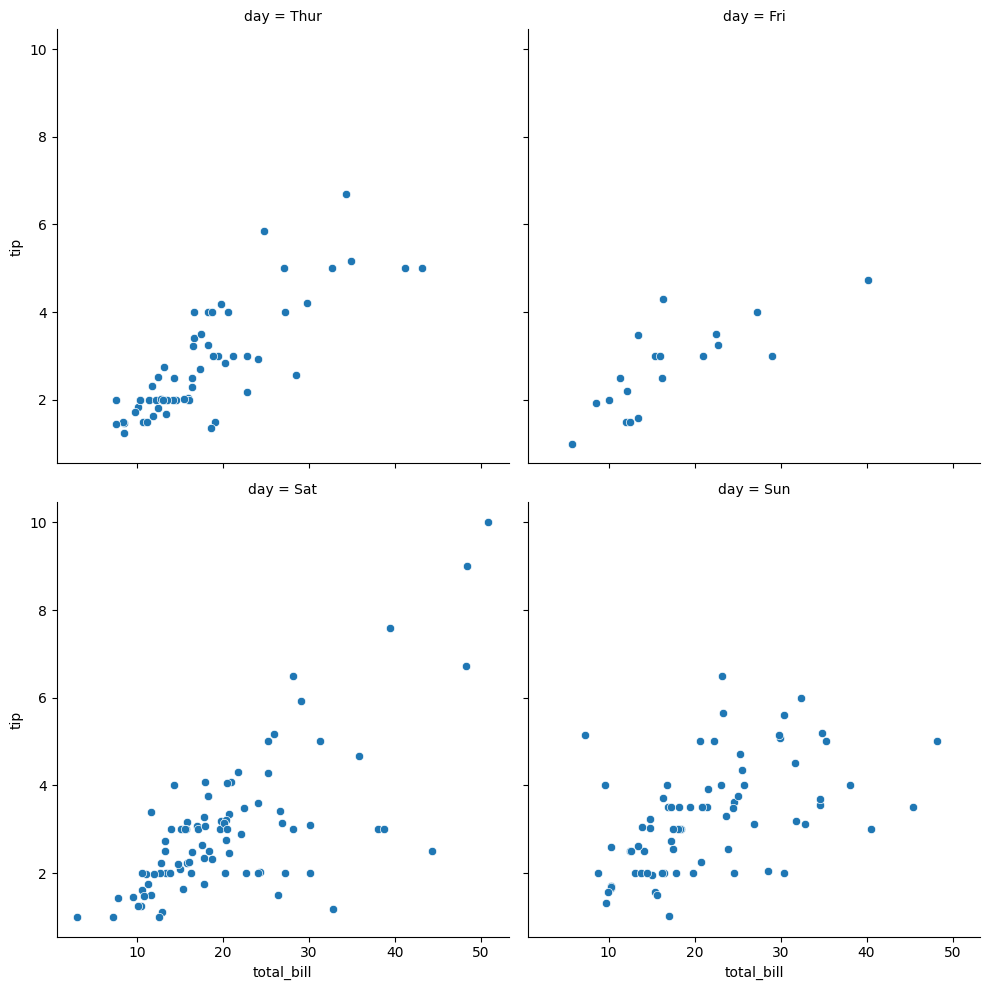

In [ ]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter", col="day", col_wrap=2)
plt.show()

### ***Creating subplots with col and row***

We've seen in prior exercises that students with more absences (`"absences"`) tend to have lower final grades (`"G3"`). Does this relationship hold regardless of how much time students study each week?

To answer this, we'll look at the relationship between the number of absences that a student has in school and their final grade in the course, creating separate subplots based on each student's weekly study time (`"study_time"`).

* Create one scatter plot for each level of the variable `"study_time"`, arranged in columns.

* Adapt your code to create one scatter plot for each level of a student's weekly study time, this time arranged in rows.

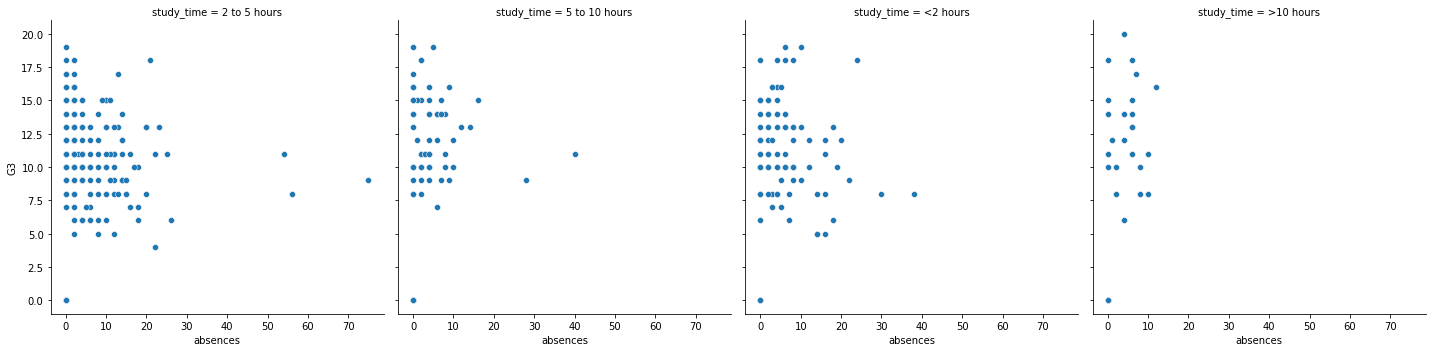

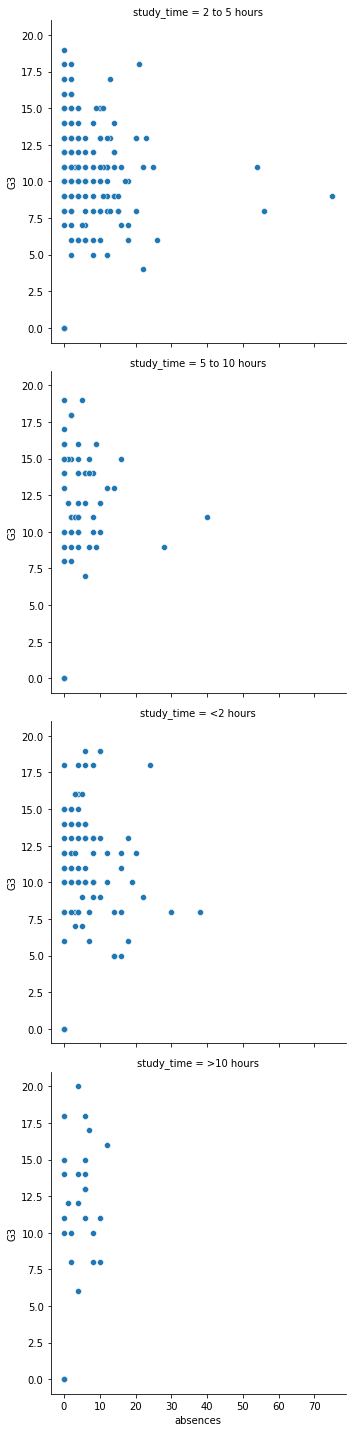

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

student_data = pd.read_csv('student-alcohol-consumption.csv').drop(columns='Unnamed: 0')

# Change this scatter plot to arrange the plots in rows instead of columns
sns.relplot(x="absences", y="G3", data=student_data, kind="scatter", col="study_time")
sns.relplot(x="absences", y="G3", data=student_data, kind="scatter", row="study_time")

# Show plot
plt.show()

Because these subplots had a large range of x values, it's easier to read them arranged in rows instead of columns.

### ***Creating two-factor subplots***

Let's continue looking at the `student_data` dataset of students in secondary school. Here, we want to answer the following question: does a student's first semester grade (`"G1"`) tend to correlate with their final grade (`"G3"`)?

There are many aspects of a student's life that could result in a higher or lower final grade in the class. For example, some students receive extra educational support from their school (`"schoolsup"`) or from their family (`"famsup"`), which could result in higher grades. Let's try to control for these two factors by creating subplots based on whether the student received extra educational support from their school or family.

* Use `relplot()` to create a scatter plot with `"G1"` on the x-axis and `"G3"` on the y-axis, using the `student_data` DataFrame.
* Create column subplots based on whether the student received support from the school (`"schoolsup"`), ordered so that `"yes"` comes before `"no"`.
* Add `row` subplots based on whether the student received support from the family (`"famsup"`), ordered so that `"yes"` comes before `"no"`. This will result in subplots based on two factors.

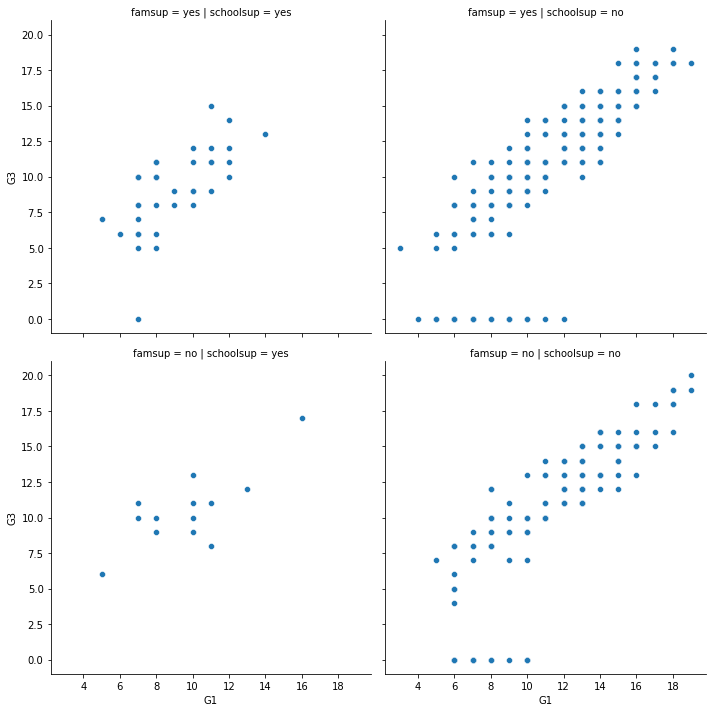

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

student_data = pd.read_csv('student-alcohol-consumption.csv').drop(columns='Unnamed: 0')

# Adjust further to add subplots based on family support
sns.relplot(x="G1", y="G3",
            data=student_data,
            kind="scatter",
            col="schoolsup",
            col_order=["yes", "no"], row='famsup', row_order=['yes', 'no'])

# Show plot
plt.show()

It looks like the first semester grade does correlate with the final grade, regardless of what kind of support the student received.

# ***Subgroups with point size***



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


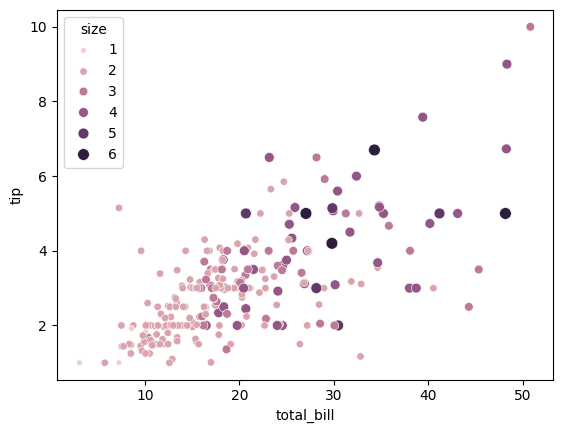

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

display(tips.head(3))

sns.scatterplot(x="total_bill", y="tip", data=tips, size='size', hue='size')
plt.show()

# ***Subgroups with point style***

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


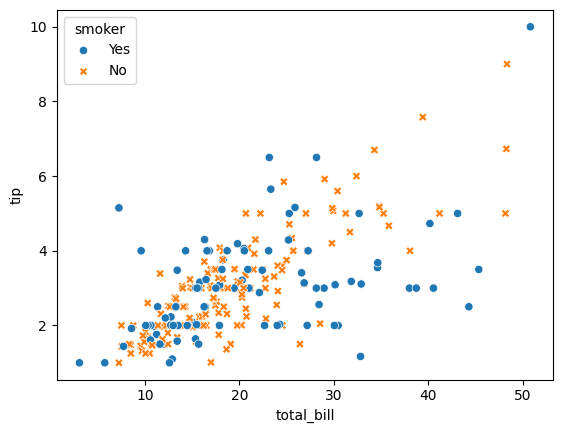

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
display(tips.head())

sns.scatterplot(x="total_bill", y="tip", data=tips, hue='smoker', style='smoker')
plt.show()

# ***Changing point transparency***

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


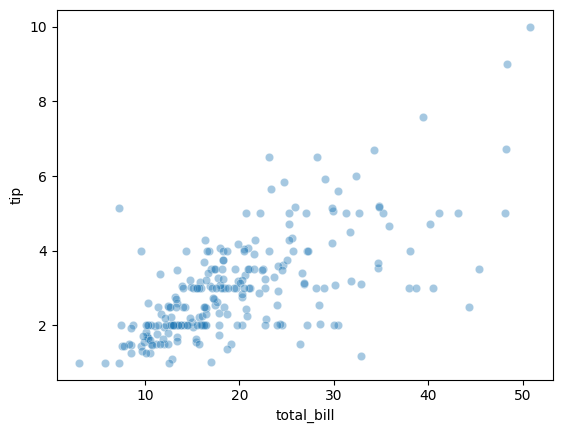

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
display(tips.head())

sns.scatterplot(x="total_bill", y="tip", data=tips, alpha=0.4)
plt.show()

### ***Changing the size of scatter plot points***

In this exercise, we'll explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, the number of miles per gallon ("M.P.G.") it achieves, the power of its engine (measured in "horsepower"), and its country of origin.

What is the relationship between the power of a car's engine (`"horsepower"`) and its fuel efficiency (`"mpg"`)? And how does this relationship vary by the number of cylinders (`"cylinders"`) the car has? Let's find out.

Let's continue to use `relplot()` instead of `scatterplot()` since it offers more flexibility.

* Use `relplot()` and the `mpg` DataFrame to create a scatter plot with `"horsepower"` on the x-axis and `"mpg"` on the y-axis. Vary the size of the points by the number of cylinders in the car (`"cylinders"`).
* To make this plot easier to read, use `hue` to vary the color of the points by the number of cylinders in the car (`"cylinders"`).

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


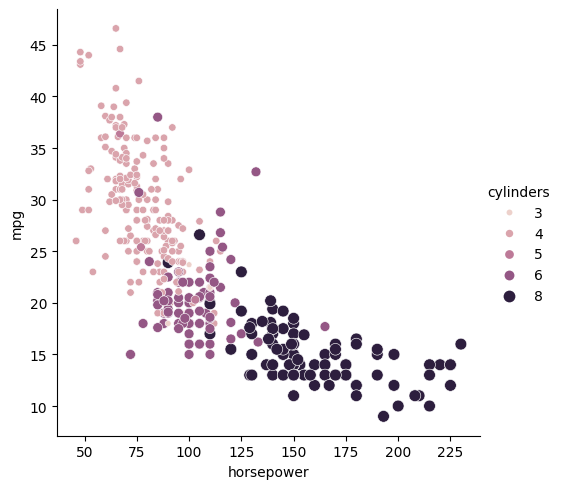

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mpg = pd.read_csv('mpg.csv')

display(mpg.head())

# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg",
            data=mpg, kind="scatter",
            size="cylinders", hue='cylinders')

# Show plot
plt.show()

Cars with higher horsepower tend to get a lower number of miles per gallon. They also tend to have a higher number of cylinders.

### ***Changing the style of scatter plot points***

Let's continue exploring Seaborn's `mpg` dataset by looking at the relationship between how fast a car can accelerate (`"acceleration"`) and its fuel efficiency (`"mpg"`). Do these properties vary by country of origin (`"origin"`)?

Note that the `"acceleration"` variable is the time to accelerate from 0 to 60 miles per hour, in seconds. Higher values indicate slower acceleration.

* Use `relplot()` and the `mpg` DataFrame to create a scatter plot with `"acceleration"` on the x-axis and `"mpg"` on the y-axis. Vary the style and color of the plot points by country of origin (`"origin"`).

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


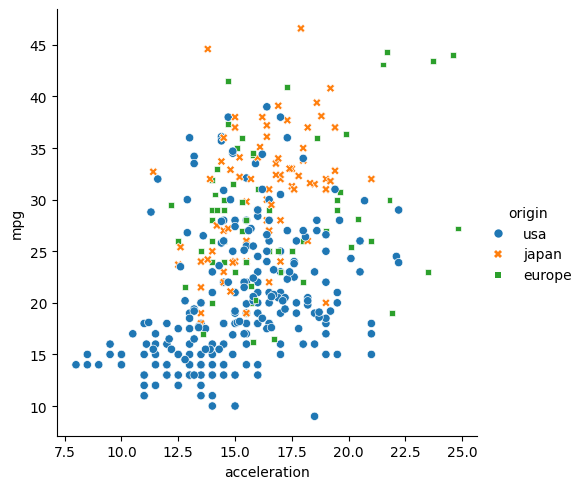

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mpg = pd.read_csv('mpg.csv')
display(mpg.head())

# Create a scatter plot of acceleration vs. mpg
sns.relplot(x='acceleration', y='mpg', data=mpg, style='origin', hue='origin', kind='scatter')
plt.show()

Cars from the USA tend to accelerate more quickly and get lower miles per gallon compared to cars from Europe and Japan.

### ***Interpreting line plots***

In this exercise, we'll continue to explore Seaborn's `mpg` dataset, which contains one row per car model and includes information such as the year the car was made, its fuel efficiency (measured in "miles per gallon" or "M.P.G"), and its country of origin (USA, Europe, or Japan).

How has the average miles per gallon achieved by these cars changed over time? Let's use line plots to find out!

* Use `relplot()` and the `mpg` DataFrame to create a line plot with `"model_year"` on the x-axis and `"mpg"` on the y-axis.

### ***The shaded region represents a confidence interval for the mean, not the distribution of the observations.***

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


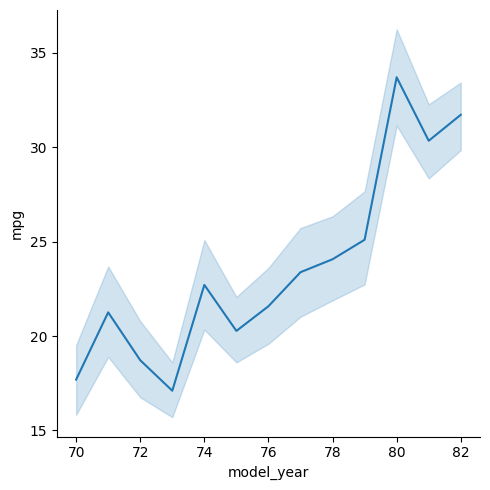

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mpg = pd.read_csv('mpg.csv')
display(mpg.head())

# Create line plot
sns.relplot(x='model_year', y='mpg', data=mpg, kind='line')


# Show plot
plt.show()

### ***Visualizing standard deviation with line plots***

In the last exercise, we looked at how the average miles per gallon achieved by cars has changed over time. Now let's use a line plot to visualize how the distribution of miles per gallon has changed over time.

* Change the plot so the shaded area shows the standard deviation instead of the confidence interval for the mean.

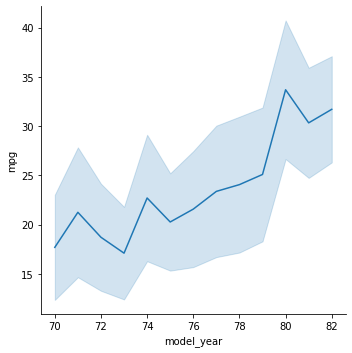

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mpg = pd.read_csv('mpg.csv')

# Make the shaded area show the standard deviation
sns.relplot(x="model_year", y="mpg",
            data=mpg, kind="line", ci='sd')

# Show plot
plt.show()

Unlike the plot in the above exercise, this plot shows us the distribution of miles per gallon for all the cars in each year.

### ***Plotting subgroups in line plots***

Let's continue to look at the `mpg` dataset. We've seen that the average miles per gallon for cars has increased over time, but how has the average horsepower for cars changed over time? And does this trend differ by country of origin?

* Use `relplot()` and the `mpg` DataFrame to create a line plot with `"model_year"` on the x-axis and `"horsepower"` on the y-axis. Turn off the confidence intervals on the plot.
* Create different lines for each country of origin (`"origin"`) that vary in both line style and color.
* Add markers for each data point to the lines.
* Use the `dashes` parameter to use solid lines for all countries, while still allowing for different marker styles for each line.

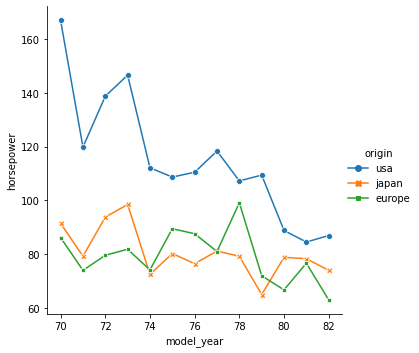

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mpg = pd.read_csv('mpg.csv')

# Add markers and make each line have the same style
sns.relplot(x="model_year", y="horsepower",
            data=mpg, kind="line",
            ci=None, style="origin",
            hue="origin", dashes=False, markers=True)

# Show plot
plt.show()

This downward trend in horsepower was more pronounced among cars from the USA.

# **Count plot and Bar plot**

* Count plot

,how_masculine
74,Somewhat masculine
80,Somewhat masculine
90,Not very masculine
29,Very masculine
0,Very masculine
13,Very masculine
21,Very masculine
91,Not very masculine
55,Somewhat masculine
43,Somewhat masculine


<ipython-input-9-4667c4f1e51d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='how_masculine', data=df, palette=sns.color_palette("tab10"))
<ipython-input-9-4667c4f1e51d>:12: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(x='how_masculine', data=df, palette=sns.color_palette("tab10"))


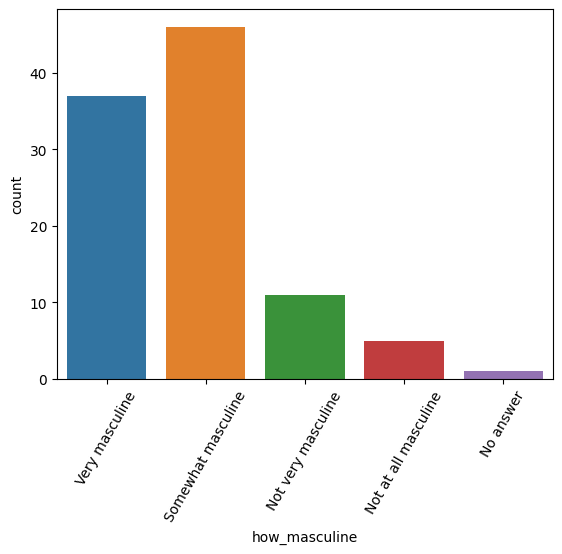

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
df = pd.read_csv('masculinity.csv')
df.rename(columns={'Unnamed: 1':'how_masculine'}, inplace=True)
df = df.head(7)
df = df[['AMONG ADULT MEN',	'how_masculine',	'Adult Men']]
df = df.dropna(subset='how_masculine')
df['Adult Men'] = df['Adult Men'].str.replace('%', '')
df['Adult Men'] = df['Adult Men'].astype(int)
masculine = [row['how_masculine'] for _, row in df.iterrows() for _ in range(row['Adult Men'])]
df = pd.DataFrame(data=masculine, columns=['how_masculine'])
display(df.sample(10))

sns.countplot(x='how_masculine', data=df, palette=sns.color_palette("tab10"))
plt.xticks(rotation=60)
plt.show()

## **Cat plot**

<ipython-input-10-7e9f143c3f2b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='how_masculine', data=df, kind='count', palette=sns.color_palette("tab10"))
<ipython-input-10-7e9f143c3f2b>:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.catplot(x='how_masculine', data=df, kind='count', palette=sns.color_palette("tab10"))


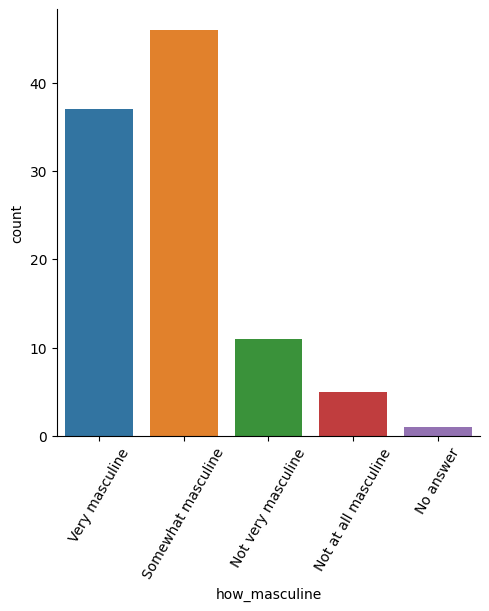

In [ ]:
sns.catplot(x='how_masculine', data=df, kind='count', palette=sns.color_palette("tab10"))
plt.xticks(rotation=60)
plt.show()

## **Changing the order in cat plot**

<ipython-input-13-6a1b8eab090c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='count', x='how_masculine', data=df, order=cat_order, palette=sns.color_palette("tab10"))
<ipython-input-13-6a1b8eab090c>:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.catplot(kind='count', x='how_masculine', data=df, order=cat_order, palette=sns.color_palette("tab10"))


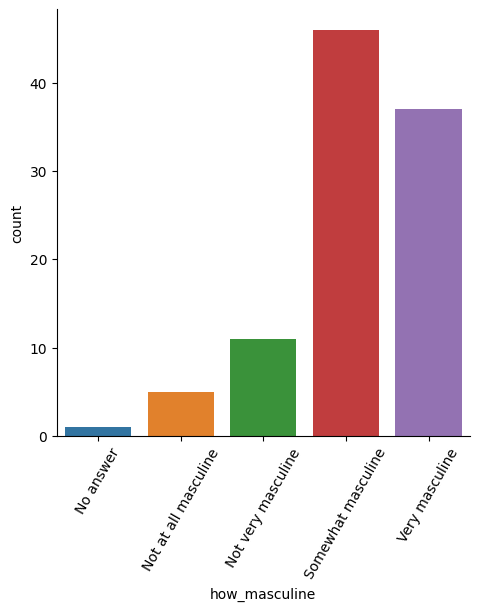

In [ ]:
cat_order = ['No answer', 'Not at all masculine', 'Not very masculine', 'Somewhat masculine', 'Very masculine']

sns.catplot(kind='count', x='how_masculine', data=df, order=cat_order, palette=sns.color_palette("tab10"))
plt.xticks(rotation=60)
plt.show()

## **Bar plot**



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


,total_bill
day,
Thur,17.682742
Fri,17.151579
Sat,20.441379
Sun,21.410000


<ipython-input-18-0697ff7873ea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar', x='day', y='total_bill', data=tips, palette=sns.color_palette("tab10"))
<ipython-input-18-0697ff7873ea>:5: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.catplot(kind='bar', x='day', y='total_bill', data=tips, palette=sns.color_palette("tab10"))


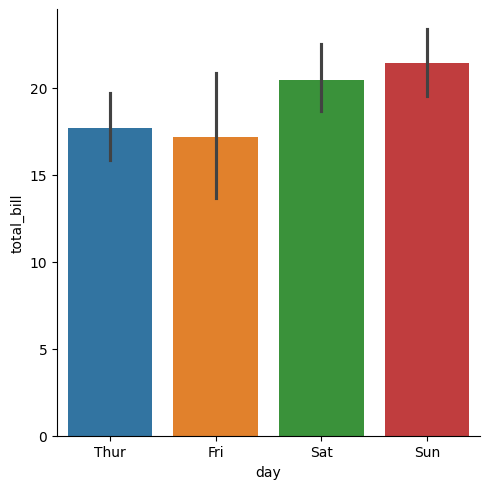

In [ ]:
tips = sns.load_dataset("tips")
display(tips.head())
print("\n")
display(tips.groupby('day')[['total_bill']].mean())
sns.catplot(kind='bar', x='day', y='total_bill', data=tips, palette=sns.color_palette("tab10"))
plt.show()


<ipython-input-20-140b394f7466>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar', y='day', x='total_bill', data=tips, palette=sns.color_palette("tab10"), ci=None)
<ipython-input-20-140b394f7466>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', y='day', x='total_bill', data=tips, palette=sns.color_palette("tab10"), ci=None)
<ipython-input-20-140b394f7466>:1: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.catplot(kind='bar', y='day', x='total_bill', data=tips, palette=sns.color_palette("tab10"), ci=None)


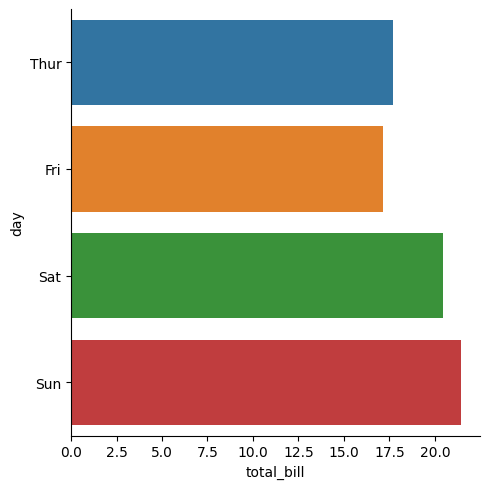

In [ ]:
sns.catplot(kind='bar', y='day', x='total_bill', data=tips, palette=sns.color_palette("tab10"), ci=None)
plt.show()


### ***Count plots***

In this exercise, we'll return to exploring our dataset that contains the responses to a survey sent out to young people. We might suspect that young people spend a lot of time on the internet, but how much do they report using the internet each day? Let's use a count plot to break down the number of survey responses in each category and then explore whether it changes based on age.

As a reminder, to create a count plot, we'll use the **`catplot()`** function and specify the name of the categorical variable to count `(x=____)`, the pandas DataFrame to use `(data=____)`, and the type of plot `(kind="count")`.

* Use **`sns.catplot()`** to create a count plot using the `survey_data` DataFrame with `"Internet usage"` on the x-axis.
* Separate this plot into two side-by-side column subplots based on `"Age Category"`, which separates respondents into those that are younger than 21 vs. 21 and older.

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village


<ipython-input-23-92eed28046a2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_data['Age Category'].iloc[i] = 'Less than 21' if j < 21 else '21+'
<ipython-input-23-92eed28046a2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Internet usage', data=survey_data, kind='count', palette=sns.color_palette("tab10"))
<ipython-input-23-92eed28046a2>:16: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.catplot(x='Internet usage', data=survey_data, kind='count', palette=sns.color_palette("tab10"))


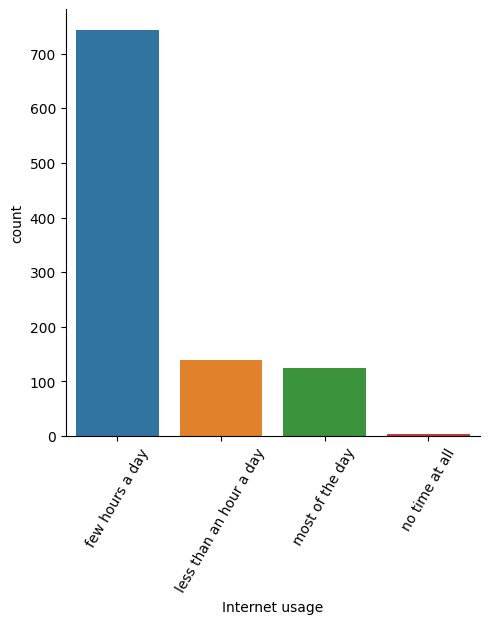

<ipython-input-23-92eed28046a2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="Internet usage", data=survey_data,
<ipython-input-23-92eed28046a2>:20: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.catplot(y="Internet usage", data=survey_data,


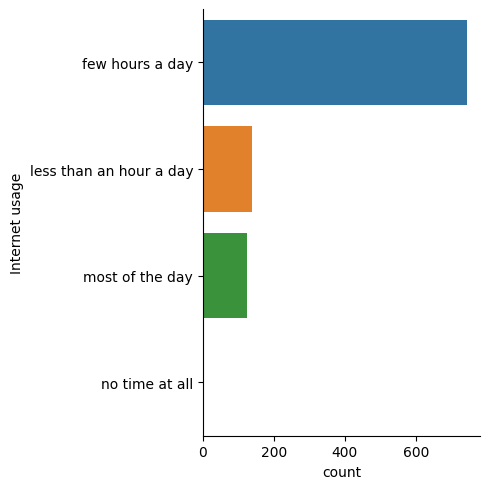

<ipython-input-23-92eed28046a2>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="Internet usage", data=survey_data,
<ipython-input-23-92eed28046a2>:25: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.catplot(y="Internet usage", data=survey_data,


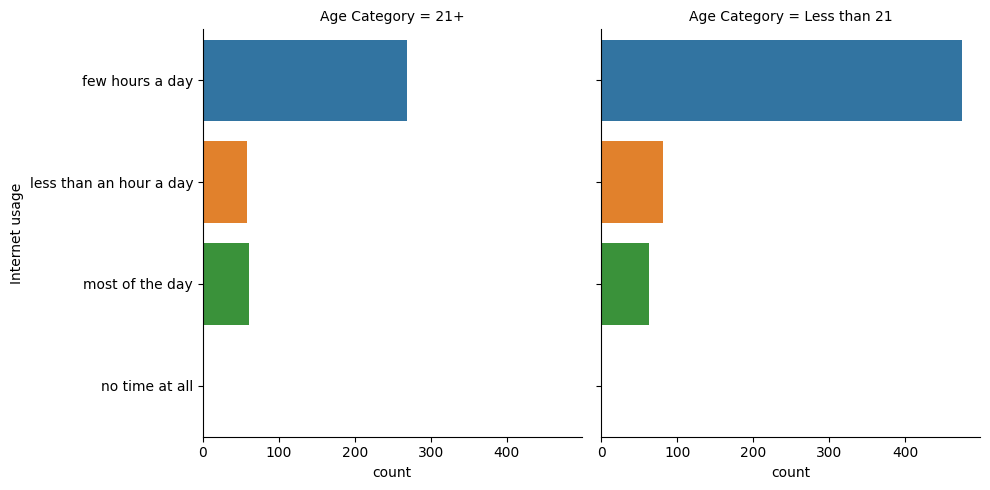

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

survey_data = pd.read_csv('young-people-survey-responses.csv').drop(columns='Unnamed: 0')
display(survey_data.head())
survey_data['Internet usage'] = survey_data['Internet usage'].astype('category')
survey_data['Age Category'] = pd.Series()

for i, j in enumerate(survey_data['Age']):
    survey_data['Age Category'].iloc[i] = 'Less than 21' if j < 21 else '21+'

survey_data['Age Category'] = survey_data['Age Category'].astype('category')

# Create count plot of internet usage
sns.catplot(x='Internet usage', data=survey_data, kind='count', palette=sns.color_palette("tab10"))
plt.xticks(rotation=60)
plt.show()

sns.catplot(y="Internet usage", data=survey_data,
            kind="count", palette=sns.color_palette("tab10"))
plt.show()

# Separate into column subplots based on age category
sns.catplot(y="Internet usage", data=survey_data,
            kind="count",
            col='Age Category', palette=sns.color_palette("tab10"))

# Show plot
plt.show()

### ***Bar plots with percentages***

Let's continue exploring the responses to a survey sent out to young people. The variable `"Interested in Math"` is `True` if the person reported being interested or very interested in mathematics, and `False` otherwise. What percentage of young people report being interested in math, and does this vary based on gender? Let's use a bar plot to find out.

As a reminder, we'll create a bar plot using the **`catplot()`** function, providing the name of categorical variable to put on the x-axis `(x=____)`, the name of the quantitative variable to summarize on the y-axis `(y=____)`, the pandas DataFrame to use `(data=____)`, and the type of categorical plot `(kind="bar")`.

* Use the `survey_data` DataFrame and **`sns.catplot()`** to create a bar plot with `"Gender"` on the x-axis and `"Interested in Math"` on the y-axis.

<ipython-input-29-88319fa9783e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_data['Interested in Math'].iloc[i] = True if j >= 4 else False


,Gender,Interested in Math
0,female,False
1,female,True
2,female,True
3,female,True
4,female,False


,Interested in Math
Gender,
female,0.163575
male,0.287105


<ipython-input-29-88319fa9783e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar', x='Gender', y='Interested in Math', data=survey_data, palette=sns.color_palette("tab10"))
<ipython-input-29-88319fa9783e>:19: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.catplot(kind='bar', x='Gender', y='Interested in Math', data=survey_data, palette=sns.color_palette("tab10"))


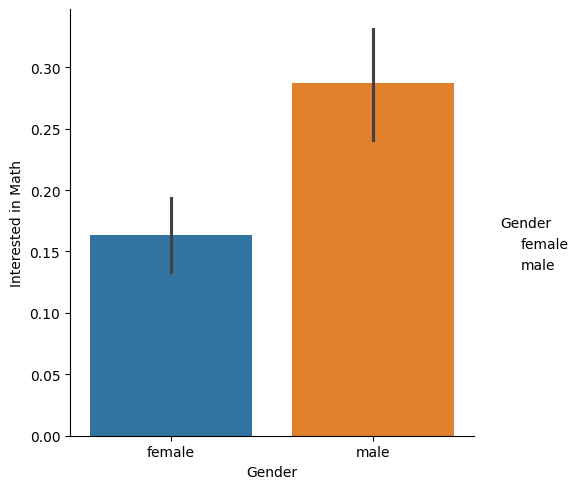

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

survey_data = pd.read_csv('young-people-survey-responses.csv').drop(columns='Unnamed: 0')
survey_data['Internet usage'] = survey_data['Internet usage'].astype('category')
survey_data['Interested in Math'] = pd.Series()

for i, j in enumerate(survey_data['Mathematics']):
    survey_data['Interested in Math'].iloc[i] = True if j >= 4 else False

survey_data['Interested in Math'] = survey_data['Interested in Math'].astype('bool')
display(survey_data[['Gender', 'Interested in Math']].head())
print("\n")
display(survey_data.groupby('Gender')[['Interested in Math']].mean())
##############################################################################

# Create a bar plot of interest in math, separated by gender
sns.catplot(kind='bar', x='Gender', y='Interested in Math', data=survey_data, palette=sns.color_palette("tab10"))

# Show plot
plt.show()

In [ ]:
student_data = pd.read_csv('student-alcohol-consumption.csv')
student_data[['G3', 'study_time']].head()

,G3,study_time
0,6,2 to 5 hours
1,6,2 to 5 hours
2,10,2 to 5 hours
3,15,5 to 10 hours
4,10,2 to 5 hours


When the y-variable is True/False, bar plots will show the percentage of responses reporting True. This plot shows us that males report a much higher interest in math compared to females.

### ***Customizing bar plots***

In this exercise, we'll explore data from students in secondary school. The `"study_time"` variable records each student's reported weekly study time as one of the following categories: `"<2 hours"`, `"2 to 5 hours"`, `"5 to 10 hours"`, or `">10 hours"`. Do students who report higher amounts of studying tend to get better final grades? Let's compare the average final grade among students in each category using a bar plot.

* Use **`sns.catplot()`** to create a bar plot with `"study_time"` on the x-axis and final grade (`"G3"`) on the y-axis, using the `student_data` DataFrame.
* Using the **`order`** parameter and the `category_order` list that is provided, rearrange the bars so that they are in order from lowest study time to highest.
* Update the plot so that it no longer displays confidence intervals.

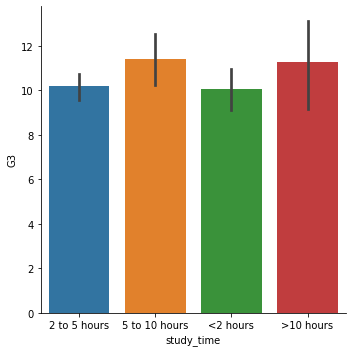

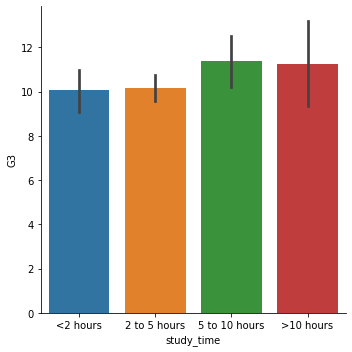

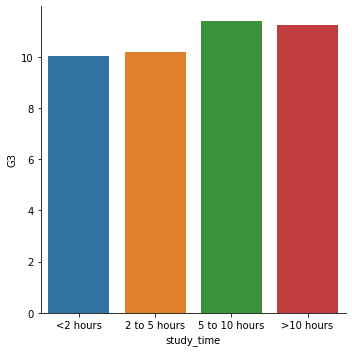

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

student_data = pd.read_csv('student-alcohol-consumption.csv')
category_order = ["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"]

# Create bar plot of average final grade in each study category
sns.catplot(kind='bar', x='study_time', y='G3', data=student_data)
plt.show()

sns.catplot(x="study_time", y="G3", data=student_data,kind="bar", order=category_order)
plt.show()

sns.catplot(x="study_time", y="G3", data=student_data, kind="bar", order=category_order, ci=None)
plt.show()

# **Box Plot**

* Using **`matplotlib.pyplot`**

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


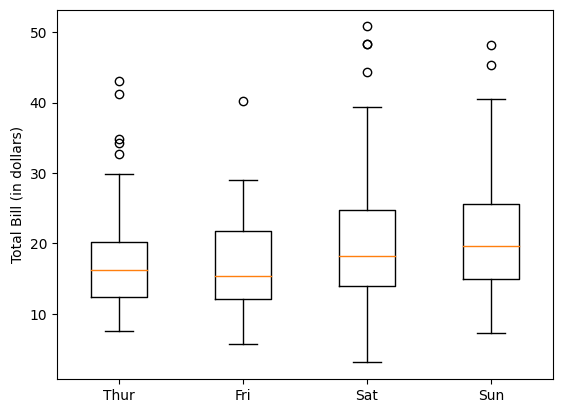

In [ ]:
tips = sns.load_dataset("tips")
display(tips.head())

tips_groups = tips.groupby('day')['total_bill']
THU = tips_groups.get_group('Thur').values
FRI = tips_groups.get_group('Fri').values
SAT = tips_groups.get_group('Sat').values
SUN = tips_groups.get_group('Sun').values

fig, ax = plt.subplots()

ax.boxplot([THU, FRI, SAT, SUN])
ax.set_xticklabels(['Thur', 'Fri', 'Sat', 'Sun'])
ax.set_ylabel('Total Bill (in dollars)')
plt.show()


* Using **`seaborn`**

<ipython-input-22-52676cbce814>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='day', y='total_bill', data=tips, kind='box', palette=sns.color_palette("tab10"))
<ipython-input-22-52676cbce814>:1: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.catplot(x='day', y='total_bill', data=tips, kind='box', palette=sns.color_palette("tab10"))


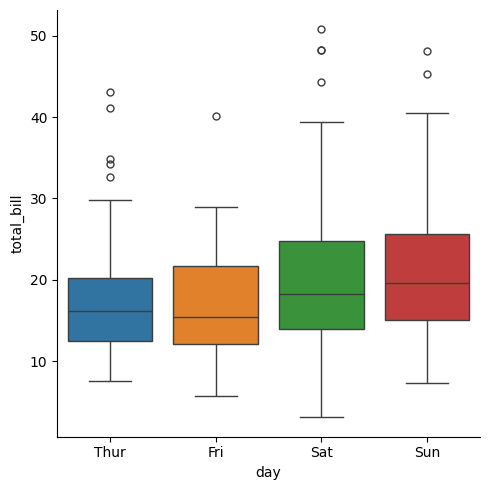

In [ ]:
sns.catplot(x='day', y='total_bill', data=tips, kind='box', palette=sns.color_palette("tab10"))
plt.show()

<ipython-input-25-eea87ad8e5d0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="time", y="total_bill", data=tips, kind="box", whis=[1, 99], palette=sns.color_palette("tab10"))
<ipython-input-25-eea87ad8e5d0>:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.catplot(x="time", y="total_bill", data=tips, kind="box", whis=[1, 99], palette=sns.color_palette("tab10"))


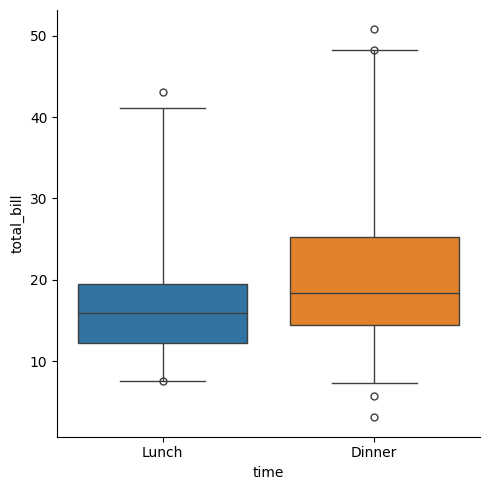

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
tips['time'] = tips['time'].astype('category')

sns.catplot(x="time", y="total_bill", data=tips, kind="box", whis=[1, 99], palette=sns.color_palette("tab10"))
plt.show()

## **Change the order of categories**

<ipython-input-24-ebee13a8a9d1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="time", y="total_bill", data=tips, kind="box", whis=[1, 99], order=['Dinner', 'Lunch'], palette=sns.color_palette("tab10"))
<ipython-input-24-ebee13a8a9d1>:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.catplot(x="time", y="total_bill", data=tips, kind="box", whis=[1, 99], order=['Dinner', 'Lunch'], palette=sns.color_palette("tab10"))


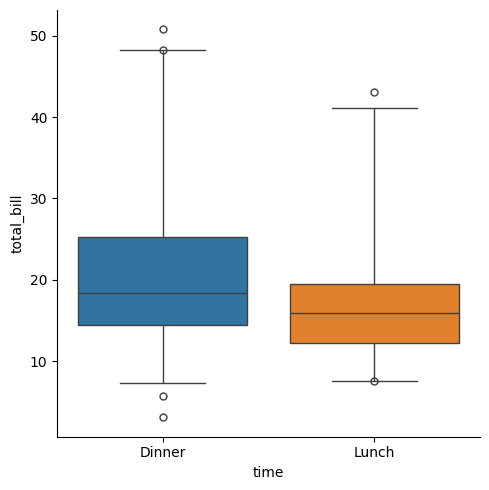

In [ ]:
sns.catplot(x="time", y="total_bill", data=tips, kind="box", whis=[1, 99], order=['Dinner', 'Lunch'], palette=sns.color_palette("tab10"))
plt.show()

## **Omit the outliers using `sym`**

*This is obsolete*

### ***Create and interpret a box plot***

Let's continue using the `student_data` dataset. In an earlier exercise, we explored the relationship between studying and final grade by using a bar plot to compare the average final grade (`"G3"`) among students in different categories of `"study_time"`.

In this exercise, we'll try using a box plot look at this relationship instead. As a reminder, to create a box plot you'll need to use the **`catplot()`** function and specify the name of the categorical variable to put on the x-axis `(x=____)`, the name of the quantitative variable to summarize on the y-axis `(y=____)`, the pandas DataFrame to use `(data=____)`, and the type of plot `(kind="box")`.

* Use **`sns.catplot()`** and the `student_data` DataFrame to create a box plot with `"study_time"` on the x-axis and `"G3"` on the y-axis. Set the ordering of the categories to `study_time_order`.

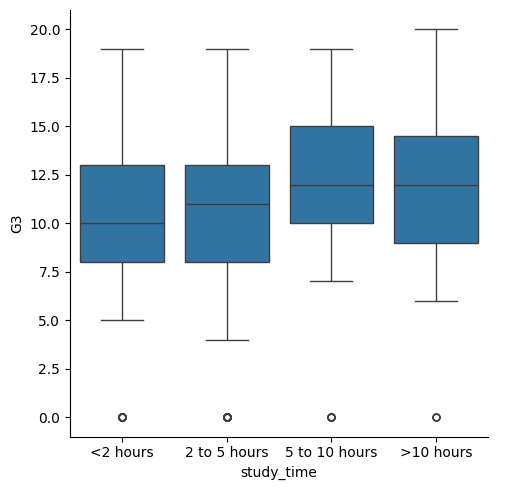

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

student_data = pd.read_csv('student-alcohol-consumption.csv')

study_time_order = ["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(data=student_data, kind='box', x='study_time', y='G3', order=study_time_order)
plt.show()

### ***Omitting outliers***

Now let's use the `student_data` dataset to compare the distribution of final grades (`"G3"`) between students who have internet access at home and those who don't. To do this, we'll use the `"internet"` variable, which is a binary (yes/no) indicator of whether the student has internet access at home.

Since internet may be less accessible in rural areas, we'll add subgroups based on where the student lives. For this, we can use the `"location"` variable, which is an indicator of whether a student lives in an urban (`"Urban"`) or rural (`"Rural"`) location.

As a reminder, you can omit outliers in box plots by setting the **`sym`** parameter equal to an empty string (`""`).

* Use **`sns.catplot()`** to create a box plot with the `student_data` DataFrame, putting `"internet"` on the x-axis and `"G3"` on the y-axis.
* Add subgroups so each box plot is colored based on `"location"`.
* Do not display the outliers.

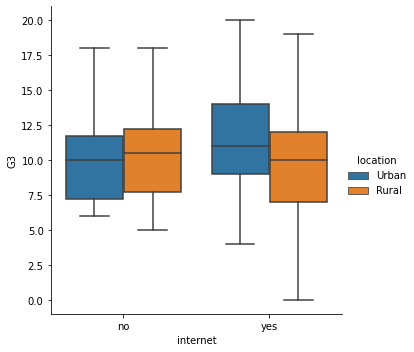

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

student_data = pd.read_csv('student-alcohol-consumption.csv')

sns.catplot(kind='box', data=student_data, x='internet', y='G3', hue='location', sym='')

plt.show()

The median grades are quite similar between each group, but the spread of the distribution looks larger among students who have internet access.

### ***Adjusting the whiskers***

There are multiple ways to define the whiskers in a box plot. In this exercise, we'll continue to use the student_data dataset to compare the distribution of final grades (`"G3"`) between students who are in a romantic relationship and those that are not. We'll use the `"romantic"` variable, which is a yes/no indicator of whether the student is in a romantic relationship.

Let's create a box plot to look at this relationship and try different ways to define the whiskers.

* Adjust the code to make the box plot whiskers to extend to `0.5 * IQR`. Recall: the IQR is the interquartile range.

* Change the code to set the whiskers to extend to the 5th and 95th percentiles.

* Change the code to set the whiskers to extend to the min and max values.

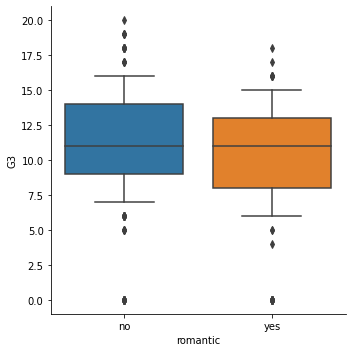

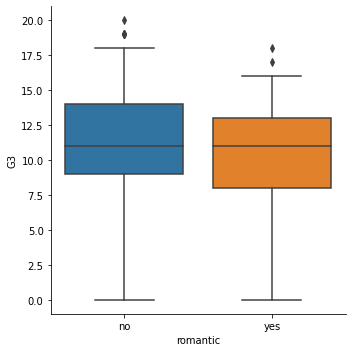

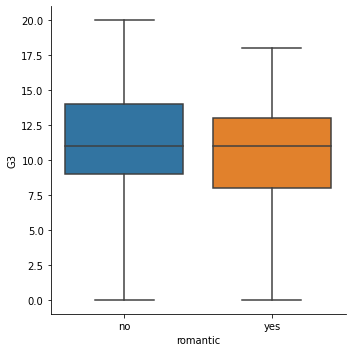

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

student_data = pd.read_csv('student-alcohol-consumption.csv')

# Set the whiskers to 0.5 * IQR
sns.catplot(x="romantic", y="G3", data=student_data, kind="box", whis=0.5)
plt.show()

# Extend the whiskers to the 5th and 95th percentile
sns.catplot(x="romantic", y="G3", data=student_data, kind="box", whis=[5, 95])
plt.show()

# Extend the whiskers to min and max
sns.catplot(x="romantic", y="G3", data=student_data, kind="box", whis=[0, 100])
plt.show()

  The median grade is the same between these two groups, but the max grade is higher among students who are not in a romantic relationship.

# ***Point plot***

* Line plot has quantitative variable (usually time) on x-axis
* Point plot has categorical variable on x-axis

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


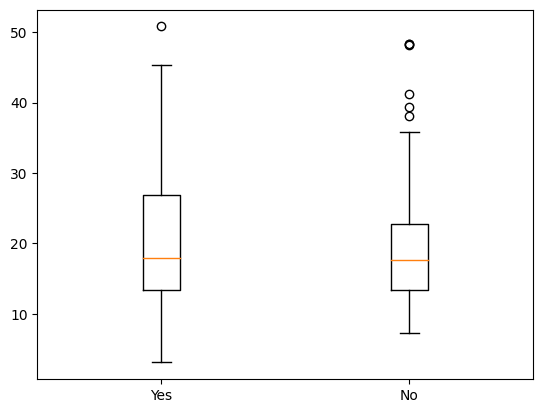

smoker
Yes    17.92
No     17.59
Name: total_bill, dtype: float64


In [ ]:
display(tips.head())
tips_groups = tips.groupby('smoker')
YES = tips_groups.get_group('Yes')['total_bill'].values
NO = tips_groups.get_group('No')['total_bill'].values

fig, ax = plt.subplots()
ax.boxplot([YES, NO])
ax.set_xticklabels(['Yes', 'No'])
plt.show()
print(tips.groupby('smoker')['total_bill'].median())

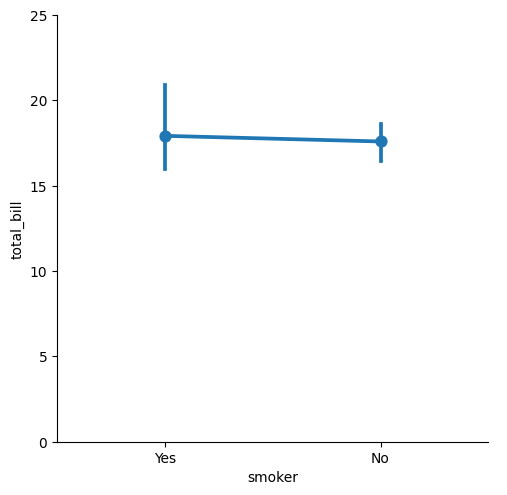

In [ ]:
sns.catplot(kind='point', data=tips, x='smoker', y='total_bill', estimator='median')
plt.ylim([0, 25])
plt.show()

## **Adding confidenc interval**

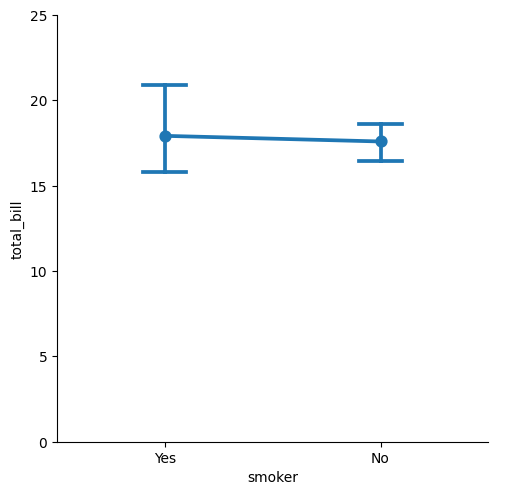

In [ ]:
sns.catplot(kind='point', data=tips, x='smoker', y='total_bill', estimator='median', capsize=0.2)
plt.ylim([0, 25])
plt.show()

## **Turning off ci**

<ipython-input-46-d3ebbd6aa5f7>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='point', data=tips, x='smoker', y='total_bill', estimator='median', ci=None)


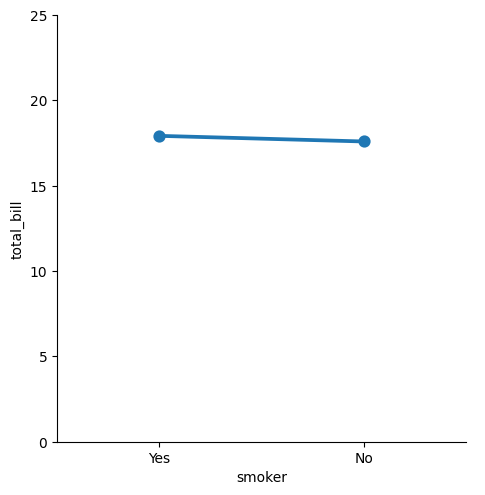

In [ ]:
sns.catplot(kind='point', data=tips, x='smoker', y='total_bill', estimator='median', ci=None)
plt.ylim([0, 25])
plt.show()



### ***Customizing point plots***

Let's continue to look at data from students in secondary school, this time using a point plot to answer the question: does the quality of the student's family relationship influence the number of absences the student has in school? Here, we'll use the `"famrel"` variable, which describes the quality of a student's family relationship from `1` (very bad) to `5` (very good).

As a reminder, to create a point plot, use the **`catplot()`** function and specify the name of the categorical variable to put on the x-axis `(x=____)`, the name of the quantitative variable to summarize on the y-axis `(y=____)`, the pandas DataFrame to use `(data=____)`, and the type of categorical plot `(kind="point")`.

* Use `sns.catplot()` and the `student_data` DataFrame to create a point plot with `"famrel"` on the x-axis and number of absences (`"absences"`) on the y-axis.
* Add `"caps"` to the end of the confidence intervals with size `0.2`.
* Remove the lines joining the points in each category.

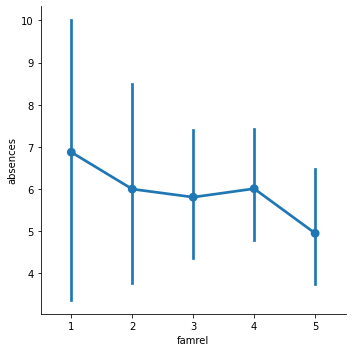

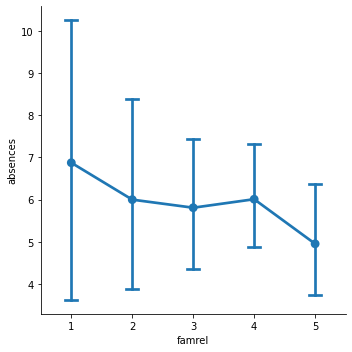

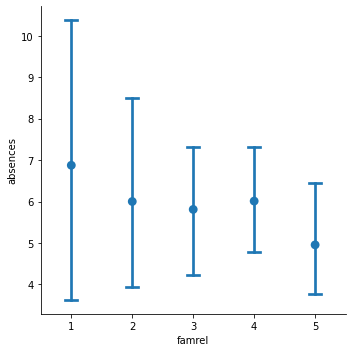

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

student_data = pd.read_csv('student-alcohol-consumption.csv')

sns.catplot(x="famrel", y="absences", data=student_data, kind="point")
plt.show()

sns.catplot(x="famrel", y="absences",	data=student_data, kind="point", capsize=0.2)
plt.show()

sns.catplot(x="famrel", y="absences", data=student_data, kind="point", capsize=0.2, join=False)
plt.show()

While the average number of absences is slightly smaller among students with higher-quality family relationships, the large confidence intervals tell us that we can't be sure there is an actual association here.

### ***Point plots with subgroups***

Let's continue exploring the dataset of students in secondary school. This time, we'll ask the question: is being in a romantic relationship associated with higher or lower school attendance? And does this association differ by which school the students attend? Let's find out using a point plot.

* Use `sns.catplot()` and the `student_data` DataFrame to create a point plot with relationship status (`"romantic"`) on the x-axis and number of absences (`"absences"`) on the y-axis. Color the points based on the school that they attend (`"school"`).
* Turn off the confidence intervals for the plot.
* Since there may be outliers of students with many absences, use the `median` function that we've imported from `numpy` to display the median number of absences instead of the average.

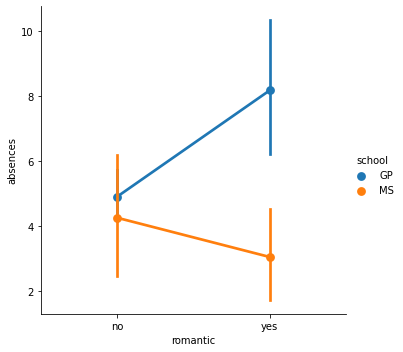

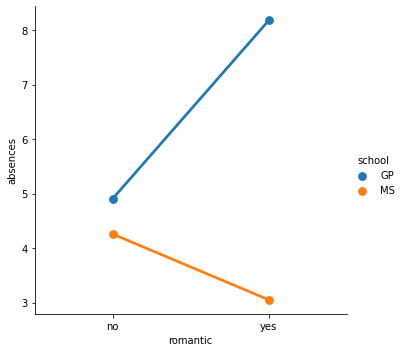

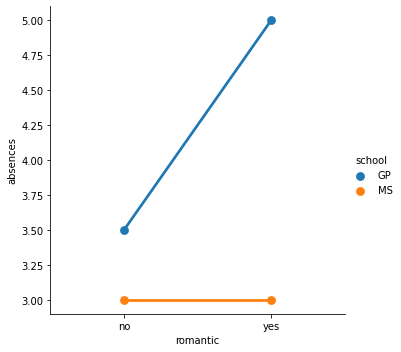

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

student_data = pd.read_csv('student-alcohol-consumption.csv')

sns.catplot(data=student_data, kind='point', x='romantic', y='absences', hue='school')
plt.show()

# Turn off the confidence intervals for this plot
sns.catplot(x="romantic", y="absences",	data=student_data,ci=None, kind="point",
            hue="school")
plt.show()

# Import median function from numpy
from numpy import median

# Plot the median number of absences instead of the mean
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            ci=None, estimator=median)

# Show plot
plt.show()

 It looks like students in romantic relationships have a higher average and median number of absences in the GP school, but this association does not hold for the MS school.

 # **Changing plot style and color**

 * Use **`sns.set_style()`** to choose from `'white'` (Default), `'dark'`, `'whitegrid'`, `'darkgrid'`, `'ticks'`

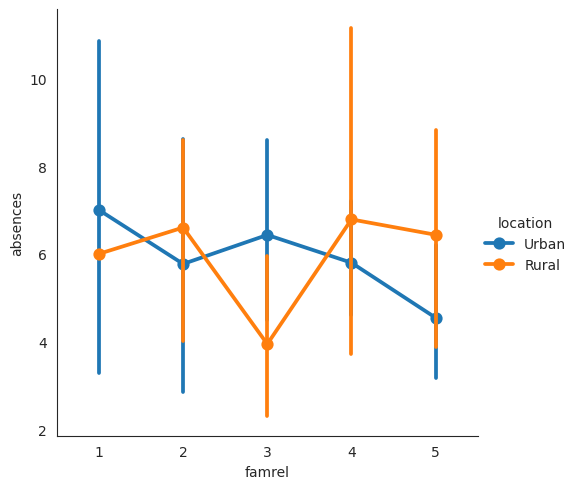

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

student_data = pd.read_csv('student-alcohol-consumption.csv')

sns.set_style('white')
sns.catplot(x="famrel", y="absences", data=student_data, kind="point", hue='location')
plt.show()




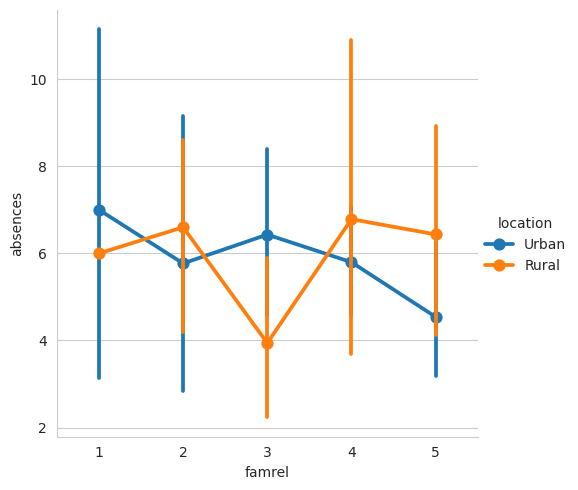

In [5]:
sns.set_style('whitegrid')
sns.catplot(x="famrel", y="absences", data=student_data, kind="point", hue='location')
plt.show()

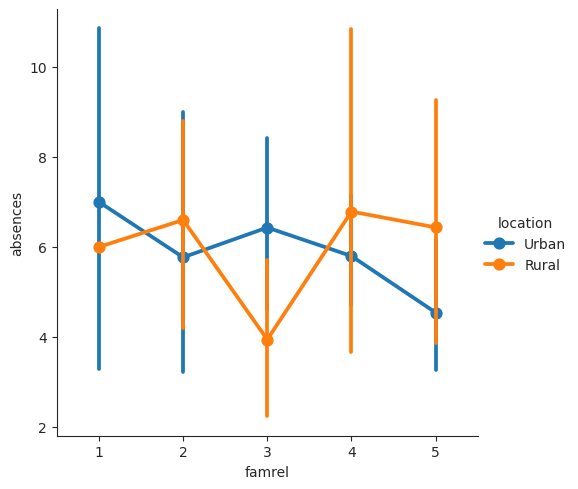

In [6]:
sns.set_style('ticks') # Add tick marks
sns.catplot(x="famrel", y="absences", data=student_data, kind="point", hue='location')
plt.show()

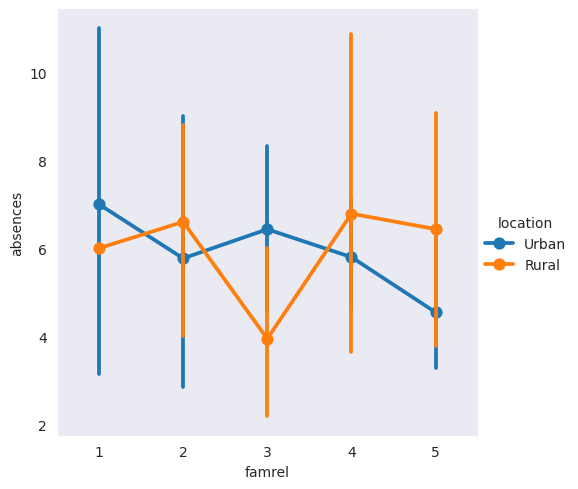

In [7]:
sns.set_style('dark')
sns.catplot(x="famrel", y="absences", data=student_data, kind="point", hue='location')
plt.show()

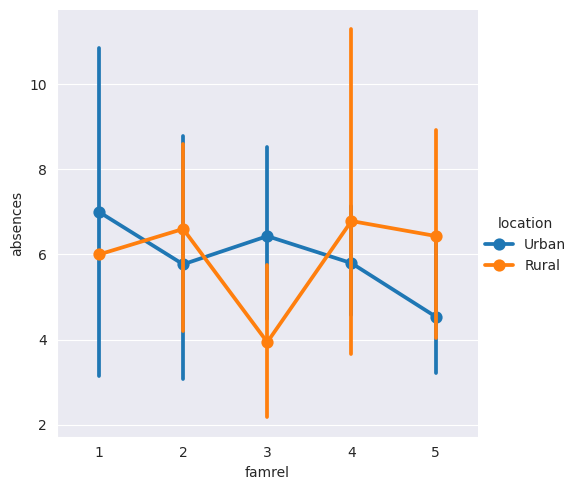

In [8]:
sns.set_style('darkgrid')
sns.catplot(x="famrel", y="absences", data=student_data, kind="point", hue='location')
plt.show()

## **Changing the palette**

* Use **`sns.set_palette()`**

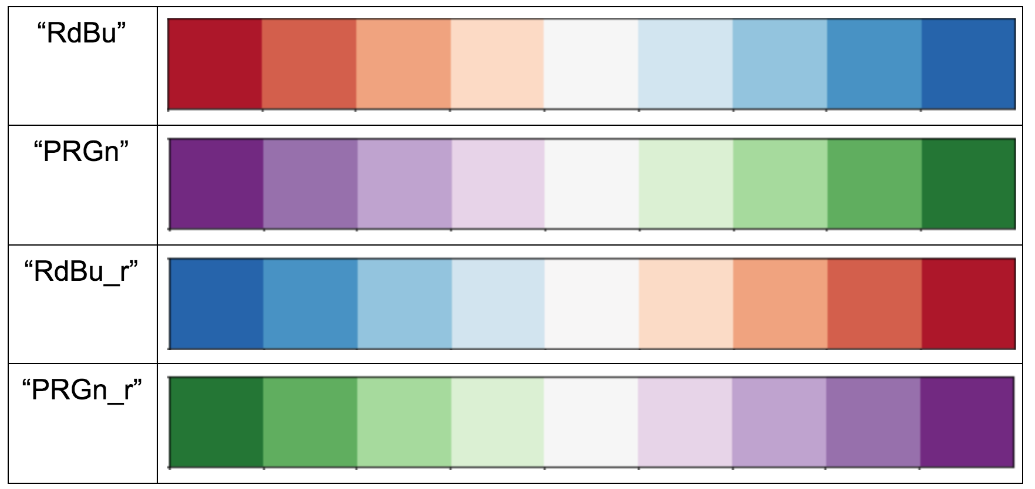

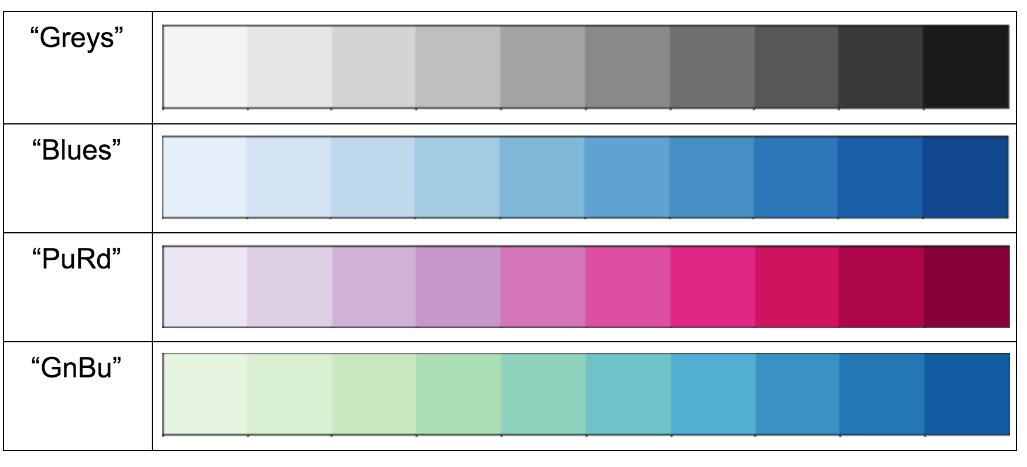

## **Custom palettes**

```
custom_palette = ['red', 'green', 'orange', 'blue', 'yellow', 'purple']

sns.set_palette(custom_palette)
```

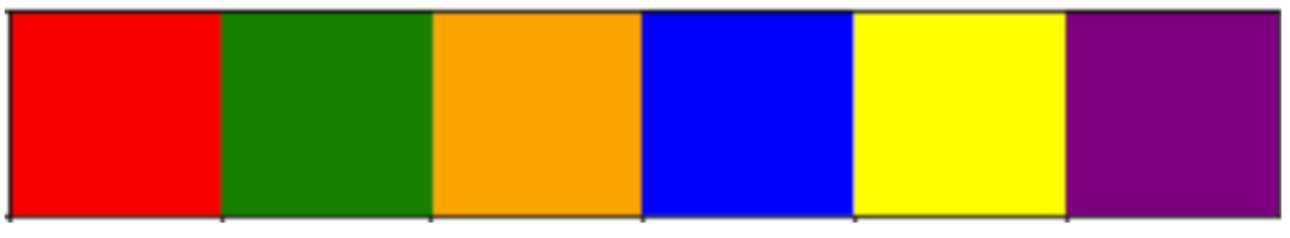

## **Changing the scale**

* Use **`sns.set_context()`** to choose from `'paper'`(Default), `'notebok'`, `'talk'`, `'poster'`.





 ### ***Changing style and palette***

Let's return to our dataset containing the results of a survey given to young people about their habits and preferences. We've provided the  code to create a count plot of their responses to the question "How often do you listen to your parents' advice?". Now let's change the style and palette to make this plot easier to interpret.

* Set the style to `"whitegrid"` to help the audience determine the number of responses in each category.

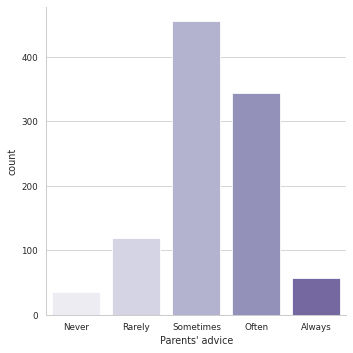

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

survey_data = pd.read_csv('young-people-survey-responses.csv').drop(columns='Unnamed: 0')
survey_data["Parents' advice"] = survey_data["Parents' advice"].map({1:"Never", 2:"Rarely", 3:"Sometimes", 4:"Often", 5:"Always"})
survey_data["Parents' advice"] = survey_data["Parents' advice"].astype('category')

# Set the style to "whitegrid"
sns.set_style('whitegrid')
sns.set_palette("Purples")
sns.set_context('paper')

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes",
                  "Often", "Always"]

sns.catplot(x="Parents' advice",
            data=survey_data,
            kind="count",
            order=category_order)

# Show plot
plt.show()

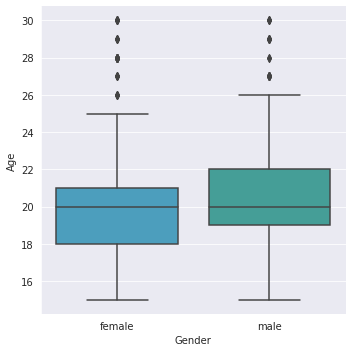

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

survey_data = pd.read_csv('young-people-survey-responses.csv').drop(columns='Unnamed: 0')

# Set the style to "darkgrid"
sns.set_style('darkgrid')

# Set a custom color palette
sns.set_palette(["#39A7D0", "#36ADA4"])

# Create the box plot of age distribution by gender
sns.catplot(x="Gender", y="Age",
            data=survey_data, kind="box")

# Show plot
plt.show()

It looks like the median age is the same for males and females, but distribution of females skews younger than the males.

# **FacetGrid vs. AxesSubplot objects**

<class 'matplotlib.axes._axes.Axes'>


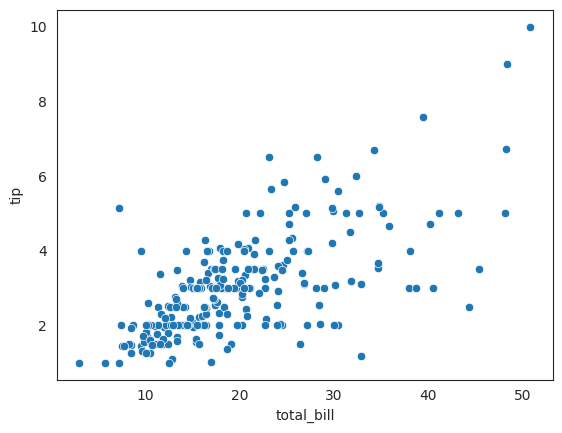

In [12]:
tips = sns.load_dataset("tips")

g = sns.scatterplot(x="total_bill", y="tip", data=tips)
print(type(g))

<class 'seaborn.axisgrid.FacetGrid'>


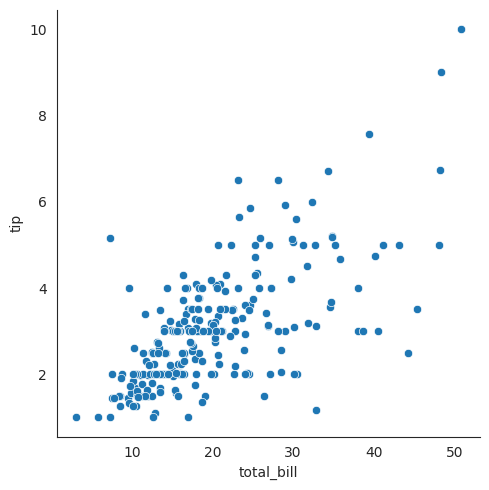

In [13]:
g = sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter")
print(type(g))

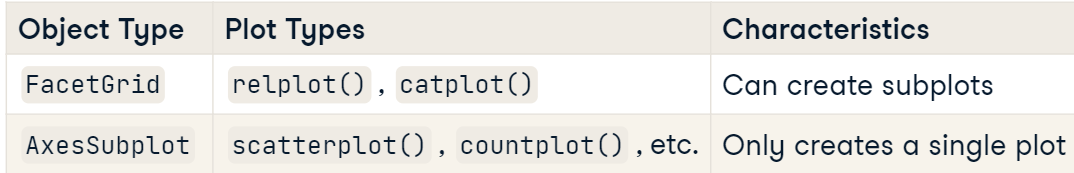

## **Adding title to FacetGrid**

 * Use **`g.fig.suptitle('your title')`**

## **Adding title to AxesSubplot**

  * Use **`g.set_title('your title')`**

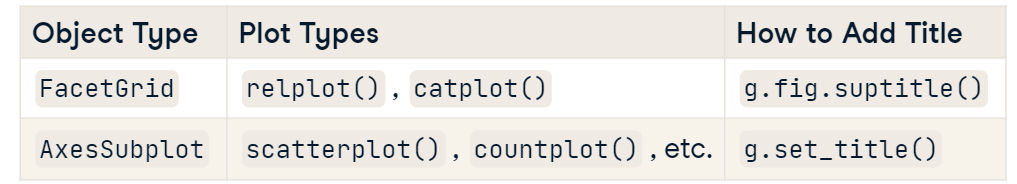

## **Adjusting height of title to FacetGrid/ AxesObjects**

  * Add **`y`** argument, e.g., **`g.fig.suptitle('your title', y=some number)`**

## **Titles for subplots**

* Use **`g.set_titles('{col_name}')`** (title มีตัว s)

## **`Adding axis labels`**

* Use **`g.set(xlabel='your x', ylabel='your y')`**

## **Rotating the x-axis labels**

* Use **`plt.xticks(rotation=90)`**




# ***FacetGrids vs. AxesSubplots***

In the recent lesson, we learned that Seaborn plot functions create two different types of objects: **`FacetGrid`** objects and **`AxesSubplot`** objects. The method for adding a title to your plot will differ depending on the type of object it is.

In the code provided, we've used **`relplot()`** with the miles per gallon dataset to create a scatter plot showing the relationship between a car's weight and its horsepower. This scatter plot is assigned to the variable name `g`. Let's identify which type of object it is.

* Identify what type of object plot `g` is and assign it to the variable `type_of_g`.



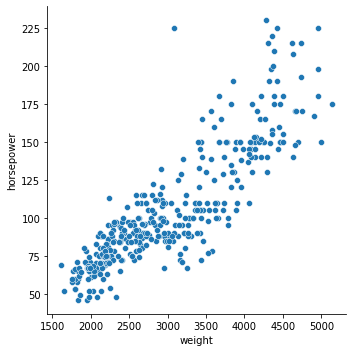

<class 'seaborn.axisgrid.FacetGrid'>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mpg = pd.read_csv('mpg.csv')

# Create scatter plot
g = sns.relplot(x="weight",
                y="horsepower",
                data=mpg,
                kind="scatter")

plt.show()
# Identify plot type
type_of_g = type(g)

# Print type
print(type_of_g)

# ***Adding a title to a FacetGrid object***

In the previous exercise, we used `relplot()` with the miles per gallon dataset to create a scatter plot showing the relationship between a car's weight and its horsepower. This created a `FacetGrid` object. Now that we know what type of object it is, let's add a title to this plot.

* Add the following title to this plot: `"Car Weight vs. Horsepower"`.

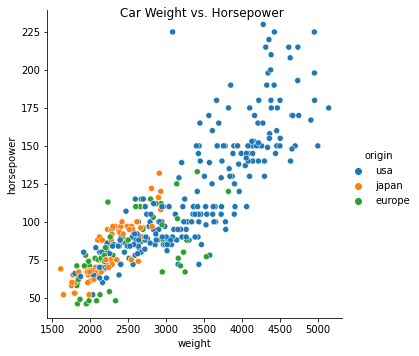

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mpg = pd.read_csv('mpg.csv')

# Create scatter plot
g = sns.relplot(x="weight",
                y="horsepower",
                data=mpg,
                kind="scatter", hue='origin')

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle('Car Weight vs. Horsepower')

# Show plot
plt.show()

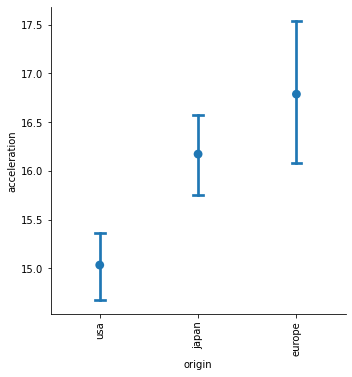

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mpg = pd.read_csv('mpg.csv')

sns.catplot(x="origin",
            y="acceleration",
            data=mpg,
            kind="point",
            join=False,
            capsize=0.1)

# Rotate x-tick labels

plt.xticks(rotation=90)
# Show plot
plt.show()

Since higher values indicate slower acceleration, it looks like cars from Japan and Europe have significantly slower acceleration compares to the USA.





# ***Box plot with subgroups***

In this exercise, we'll look at the dataset containing responses from a survey given to young people. One of the questions asked of the young people was: "Are you interested in having pets?" Let's explore whether the distribution of ages of those answering "yes" tends to be higher or lower than those answering "no", controlling for gender.

Instructions
100 XP
Set the color palette to "Blues".
Add subgroups to color the box plots based on "Interested in Pets".
Set the title of the FacetGrid object g to "Age of Those Interested in Pets vs. Not".
Make the plot display using a Matplotlib function.

,Gender,Age,Interested in Pets
457,male,19.0,No
23,female,20.0,Yes
888,female,20.0,Yes
319,female,18.0,No
752,female,21.0,No


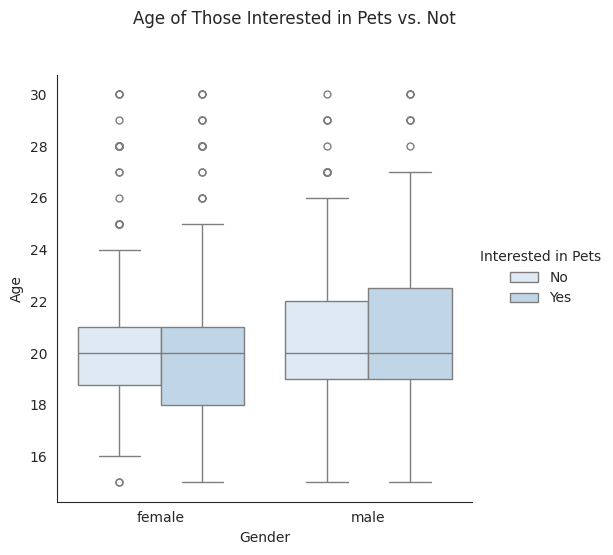

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

survey_data = pd.read_csv('young-people-survey-responses.csv').drop(columns='Unnamed: 0')
survey_data['Interested in Pets'] = pd.Series()
survey_data['Interested in Pets'] = survey_data['Pets'].apply(lambda x: 'Yes' if x >= 4 else 'No')
survey_data['Interested in Pets'] = survey_data['Interested in Pets'].astype('category')

display(survey_data[['Gender', 'Age', 'Interested in Pets']].sample(5))

# Set palette to "Blues"
sns.set_palette('Blues')

# Adjust to add subgroups based on "Interested in Pets"

g = sns.catplot(x="Gender",
                y="Age", data=survey_data,
                kind="box", hue='Interested in Pets')

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle('Age of Those Interested in Pets vs. Not', y=1.1)

# Show plot
plt.show()

# ***Bar plot with subgroups and subplots***

In this exercise, we'll return to our young people survey dataset and investigate whether the proportion of people who like techno music (`"Likes Techno"`) varies by their gender (`"Gender"`) or where they live (`"Village - town"`). This exercise will give us an opportunity to practice the many things we've learned throughout this course!

We've already imported Seaborn as `sns` and matplotlib.pyplot as `plt`.

* Set the figure style to `"dark"`.
* Adjust the bar plot code to add subplots based on `"Gender"`, arranged in columns.
* Add the title `"Percentage of Young People Who Like Techno"` to this FacetGrid plot.
* Label the x-axis `"Location of Residence"` and y-axis `"% Who Like Techno"`.

,Village - town,Likes Techno,Gender
702,city,False,male
349,city,True,female
26,city,False,female
867,city,False,female
190,city,False,female


<ipython-input-22-31bd4ad018b8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="Village - town", y="Likes Techno",
<ipython-input-22-31bd4ad018b8>:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.catplot(x="Village - town", y="Likes Techno",


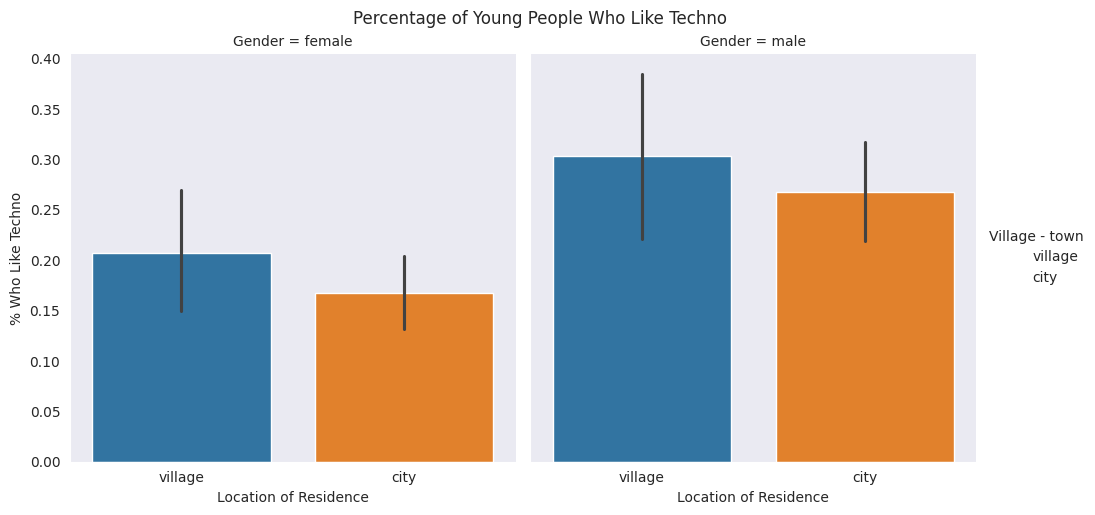

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

survey_data = pd.read_csv('young-people-survey-responses.csv').drop(columns='Unnamed: 0')
survey_data['Likes Techno'] = survey_data['Techno'].apply(lambda x: True if x >= 4 else False)
survey_data['Likes Techno'] = survey_data['Likes Techno'].astype('bool')

display(survey_data[['Village - town', 'Likes Techno', 'Gender']].sample(5))

# Set the figure style to "dark"
sns.set_style('dark')

# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Likes Techno",
                data=survey_data, kind="bar",
                col='Gender', palette=sns.color_palette("tab10"))

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence",
       ylabel="% Who Like Techno")

# Show plot
plt.show()

In [24]:
# How the above figures come from.
survey_data.groupby(['Village - town', 'Gender'])[['Likes Techno']].mean()

Likes Techno
Village - town Gender              
city           female      0.167866
               male        0.268293
village        female      0.206897
               male        0.303279